<a href="https://colab.research.google.com/github/pzuniga/Housing_Sales_Prediction/blob/main/wk12_011_Kaggle_NN_Housing_Sales_Prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO - BOOTCAMP DATA SCIENCE - SPANISH**
**wk12_Kaggle_NN**

Predict sales prices and practice feature engineering, RFs, and gradient boosting

Pablo Zúñiga N. / ZetaLabs
20221007

#0.Desafío a solucionar

**The Problem**

**Start here if...**
You have some experience with R or Python and machine learning basics. This is a perfect competition for data science students who have completed an online course in machine learning and are looking to expand their skill set before trying a featured competition. 

**Competition Description**

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**Practice Skills**
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting

**Acknowledgments**
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview


**Data fields**

Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno                                  # Graficar valores faltantes
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import label_binarize          # Para situaciones multiclases OvR
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer

# Métricas de evaluación de modelo de predicción - regresión
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Instancias de modelo de predicción - clasificación
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree                                  # Visualizar árbol
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instancias Keras/Tensorflow
import  tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Métricas de regresión
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Métricas de clasificación
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, RocCurveDisplay,auc
from sklearn.metrics._plot.roc_curve import roc_curve

# Agrupamiento no supervisado
from itertools import combinations        # Combinatoria en una lista
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter

# Reducción de dimensionalidad
from sklearn.decomposition import PCA

# Afinar hiperparámetros ML
from sklearn.model_selection import GridSearchCV

# Estas líneas permite revisar visualmente el pipeline
from sklearn import set_config
set_config(display='diagram') # Para mostrar como diagrama

# Centrar imágenes matplotlib
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [ ]:
# Montar el directorio de datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Crear variable con ruta de acceso al archivo
filename_csv_1 = "/content/drive/MyDrive/Colab Notebooks/wk12_Kaggle/train.csv"
filename_csv_2 = "/content/drive/MyDrive/Colab Notebooks/wk12_Kaggle/test.csv"

# **1. Limpieza de datos**

## 1.1. Análisis preliminar: cargar datos, Head(), tail(), info(), shape()

In [ ]:
# 1.1.1. Cargar archivo de datos en df
# Cargar datos CSV  y asignar a dataframe df
df1=pd.read_csv(filename_csv_1)
df2=pd.read_csv(filename_csv_2)

In [ ]:
df=pd.concat([df1,df2],ignore_index=True)
df = df.set_index('Id')

In [ ]:
# Conocer columnas
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [ ]:
# 1.1.2. Revisar la cabeza
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0


In [ ]:
# 1.1.3. Revisar la cola
df.tail(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2910,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,NaN
2911,160,RM,21.0,1484,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN
2912,20,RL,80.0,13384,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN
2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,NaN
2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [ ]:
# 1.1.4. Obtener la descripción de df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

Diccionario de datos:


In [ ]:
# 1.1.5. Mostrar la forma del df
# filas/columnas
df.shape

(2919, 80)

## 1.2. Revisar y tratar filas duplicadas

In [ ]:
# Búsqueda de duplicados
# Existen duplicados en df, sin embargo no hay inconsistencia.
df.duplicated().sum()

0

## 1.3. Revisar y tratar valores faltantes
Se incluye una breve descripción del tratamiento: método y justificación.

###1.3.1. Identificación de valores faltantes - iteración #1

In [ ]:
# Identificar y abordar cualquier dato que falte en este conjunto de datos.
# Columnas con datos faltantes
# No existen
df.isna().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

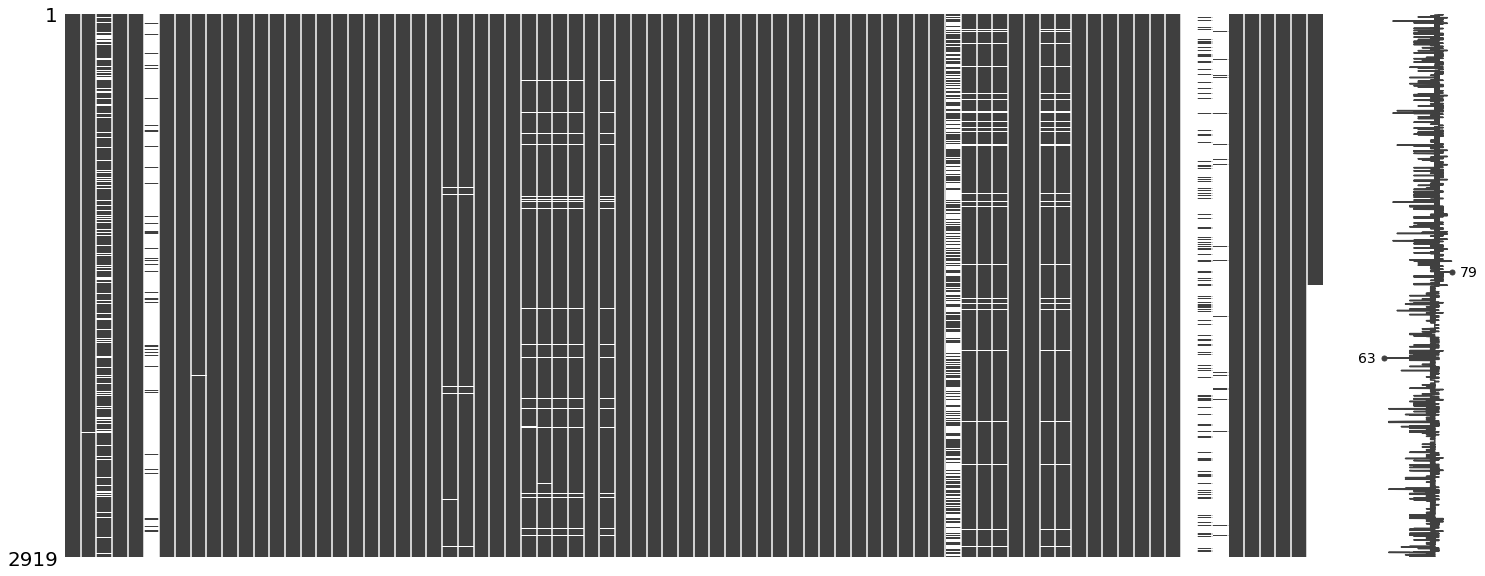

In [ ]:
# Grafico de valores faltantes, visión integral
# Todas las columnas se encuentran pobladas de datos.
# Sin embargo, se advierte la necesidad de revisar la consistencia de los valores e iterar el proceso de datos faltantes.
msno.matrix(df)

## 1.4. Revisar y tratar valores incosistentes
Se incluye una breve descripción del tratamiento: método y justificación.

In [ ]:
# Estadística descriptiva del conjunto de datos
# No se aprecian datos inconsistences en los valores
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [ ]:
list_column=df.columns.tolist()
print(list_column)

for index,col in enumerate(list_column):
  print('\nANÁLISIS DE COLUMNA:',col)
  print('---------------------------------------')
  print('\nEstadística descriptiva')
  print(df[col].describe())
  print('Cuenta de valores nulos')
  print(df[col].isna().sum())
  print('\nValores únicos:', df[col].nunique())
  print('Cuenta de valores')
  print(df[col].value_counts().sort_index(ascending=True))

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [ ]:
# eliminar columnas redundantes
df.drop(['LotFrontage','Alley','Utilities','FireplaceQu','PoolQC','Fence','MiscFeature','MiscVal'], axis=1, inplace=True)

In [ ]:
df.shape

(2919, 72)

In [ ]:
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,61,0,0,0,0,2,2008,WD,Normal,208500.0
2,20,RL,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
3,60,RL,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,42,0,0,0,0,9,2008,WD,Normal,223500.0
4,70,RL,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,35,272,0,0,0,2,2006,WD,Abnorml,140000.0
5,60,RL,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,84,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2916,160,RM,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,24,0,0,0,0,4,2006,WD,Abnorml,NaN
2917,20,RL,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN


In [ ]:
# Revisión de columnas numéricas
# Homogeneizar dtypes para codificar en preprocesamiento
col_type= ['LotArea','YearBuilt','YearRemodAdd',
              'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
              'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
              'GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF',
              'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
              'PoolArea']

# Imprimir tipo de dato de columnas seleccionadas
print(df[col_type].info())

# Eliminar filas con valores NaN
#df=df.dropna(subset=col_type)

# Convertir el tipo de datos de columnas
type='float64'
for index,col in enumerate(col_type):
  df[col] = df[col].astype(type)

# Imprimir tipo de dato de columnas seleccionadas
print(df[col_type].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        2919 non-null   int64  
 1   YearBuilt      2919 non-null   int64  
 2   YearRemodAdd   2919 non-null   int64  
 3   MasVnrArea     2896 non-null   float64
 4   BsmtFinSF1     2918 non-null   float64
 5   BsmtFinSF2     2918 non-null   float64
 6   BsmtUnfSF      2918 non-null   float64
 7   TotalBsmtSF    2918 non-null   float64
 8   1stFlrSF       2919 non-null   int64  
 9   2ndFlrSF       2919 non-null   int64  
 10  LowQualFinSF   2919 non-null   int64  
 11  GrLivArea      2919 non-null   int64  
 12  GarageYrBlt    2760 non-null   float64
 13  GarageArea     2918 non-null   float64
 14  WoodDeckSF     2919 non-null   int64  
 15  OpenPorchSF    2919 non-null   int64  
 16  EnclosedPorch  2919 non-null   int64  
 17  3SsnPorch      2919 non-null   int64  
 18  ScreenPo

In [ ]:
# Revisión de columnas ordinales
# Homogeneizar dtypes para codificar en preprocesamiento
col_type= ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath',
    'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
    'TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']

# Imprimir tipo de dato de columnas seleccionadas
print(df[col_type].info())

# Eliminar filas con valores NaN
#df=df.dropna(subset=col_type)

# Convertir el tipo de datos de columnas
type='category'
for index,col in enumerate(col_type):
  df[col] = df[col].astype(type)

# Imprimir tipo de dato de columnas seleccionadas
print(df[col_type].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   2919 non-null   int64  
 1   OverallCond   2919 non-null   int64  
 2   BsmtFullBath  2917 non-null   float64
 3   BsmtHalfBath  2917 non-null   float64
 4   FullBath      2919 non-null   int64  
 5   HalfBath      2919 non-null   int64  
 6   BedroomAbvGr  2919 non-null   int64  
 7   KitchenAbvGr  2919 non-null   int64  
 8   TotRmsAbvGrd  2919 non-null   int64  
 9   Fireplaces    2919 non-null   int64  
 10  GarageCars    2918 non-null   float64
 11  MoSold        2919 non-null   int64  
 12  YrSold        2919 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 319.3 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  ----

In [ ]:
# Revisión de columnas nominales
# Homogeneizar dtypes para codificar en preprocesamiento
col_type= ['MSSubClass','MSZoning','Street','LotShape','LandContour',
    'LotConfig','LandSlope','Neighborhood','Condition1','Condition2',
    'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
    'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
    'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
    'Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
    'Functional','GarageType','GarageFinish','GarageQual',
    'GarageCond','PavedDrive','SaleType','SaleCondition']

# Imprimir tipo de dato de columnas seleccionadas
print(df[col_type].info())

# Eliminar filas con valores NaN
#df=df.dropna(subset=col_type)

# Convertir el tipo de datos de columnas
type='object'
for index,col in enumerate(col_type):
  df[col] = df[col].astype(type)

# Imprimir tipo de dato de columnas seleccionadas
print(df[col_type].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     2919 non-null   int64 
 1   MSZoning       2915 non-null   object
 2   Street         2919 non-null   object
 3   LotShape       2919 non-null   object
 4   LandContour    2919 non-null   object
 5   LotConfig      2919 non-null   object
 6   LandSlope      2919 non-null   object
 7   Neighborhood   2919 non-null   object
 8   Condition1     2919 non-null   object
 9   Condition2     2919 non-null   object
 10  BldgType       2919 non-null   object
 11  HouseStyle     2919 non-null   object
 12  RoofStyle      2919 non-null   object
 13  RoofMatl       2919 non-null   object
 14  Exterior1st    2918 non-null   object
 15  Exterior2nd    2918 non-null   object
 16  MasVnrType     2895 non-null   object
 17  ExterQual      2919 non-null   object
 18  ExterCond      2919 non-null

# **2. Exploración de datos**

##2.1. Histogramas y boxplots de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     2919 non-null   object  
 1   MSZoning       2915 non-null   object  
 2   LotArea        2919 non-null   float64 
 3   Street         2919 non-null   object  
 4   LotShape       2919 non-null   object  
 5   LandContour    2919 non-null   object  
 6   LotConfig      2919 non-null   object  
 7   LandSlope      2919 non-null   object  
 8   Neighborhood   2919 non-null   object  
 9   Condition1     2919 non-null   object  
 10  Condition2     2919 non-null   object  
 11  BldgType       2919 non-null   object  
 12  HouseStyle     2919 non-null   object  
 13  OverallQual    2919 non-null   category
 14  OverallCond    2919 non-null   category
 15  YearBuilt      2919 non-null   float64 
 16  YearRemodAdd   2919 non-null   float64 
 17  RoofStyle      2919 non-null   ob

In [ ]:
df['YearRemodAdd'].value_counts().sort_index(ascending=True)

1950.0    361
1951.0     14
1952.0     15
1953.0     20
1954.0     28
         ... 
2006.0    202
2007.0    164
2008.0     81
2009.0     34
2010.0     13
Name: YearRemodAdd, Length: 61, dtype: int64

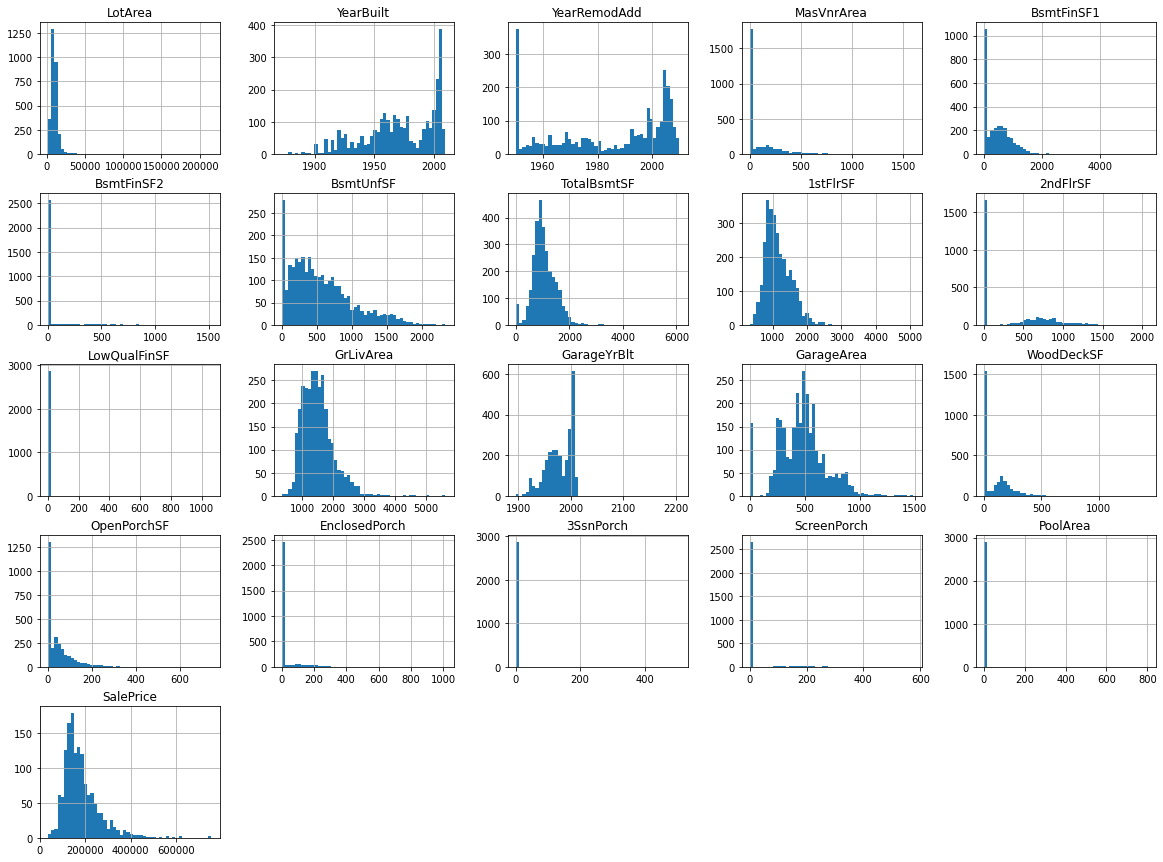

In [ ]:
# Histograma de las columnas del df
df.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

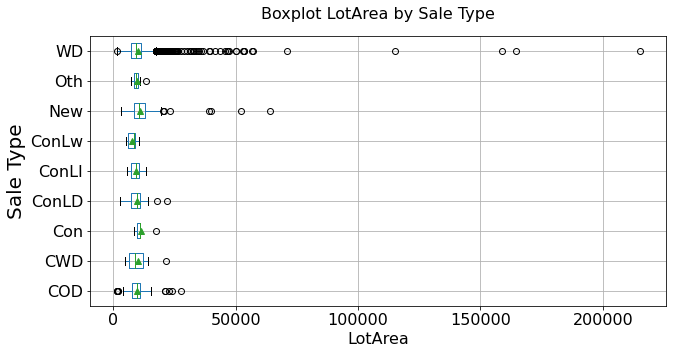

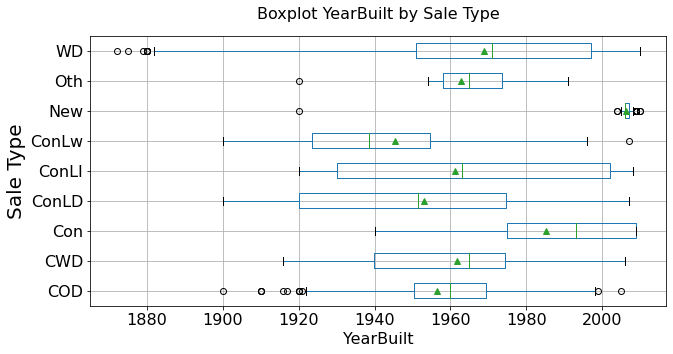

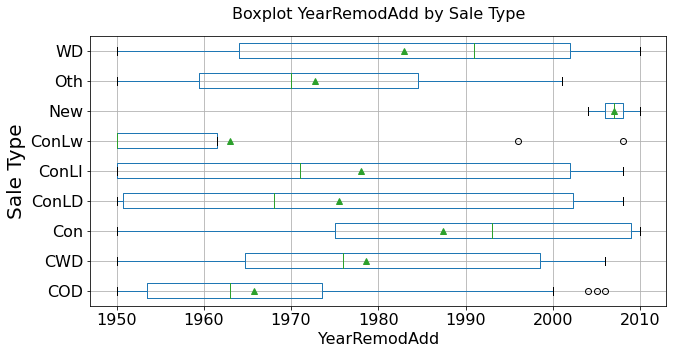

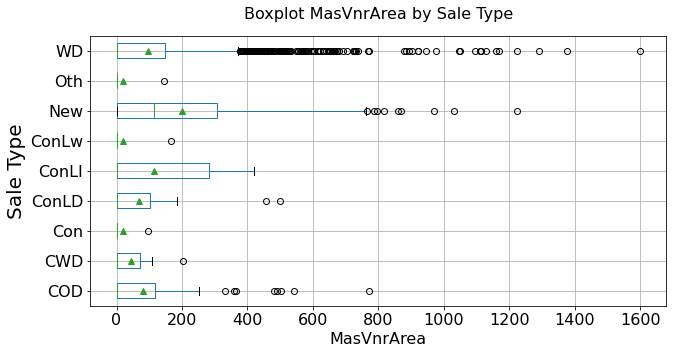

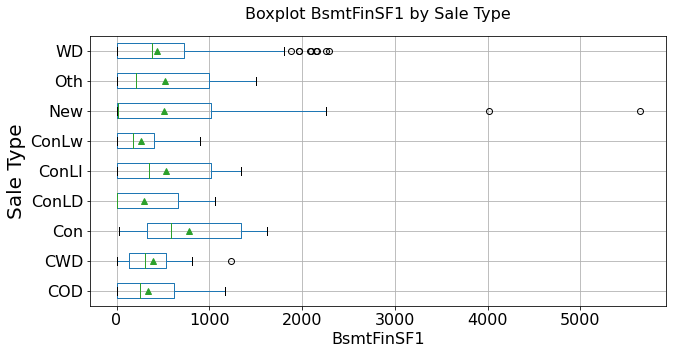

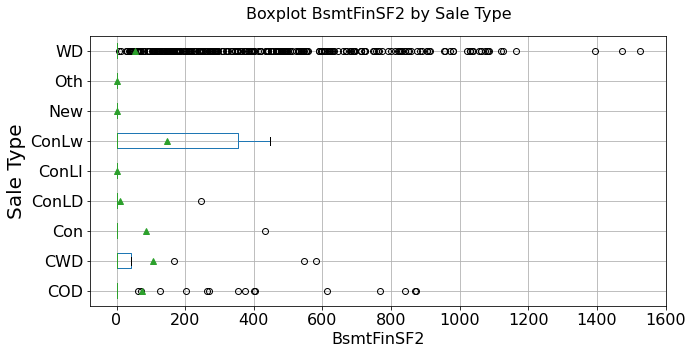

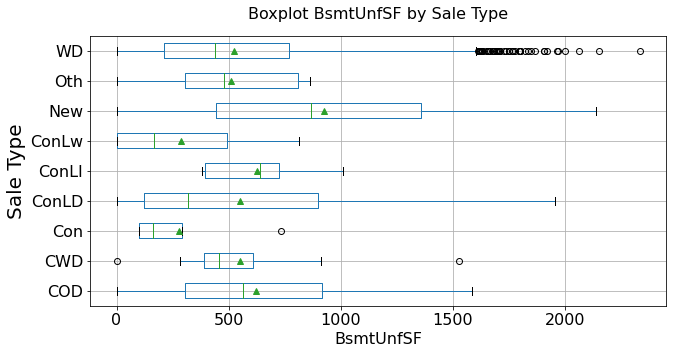

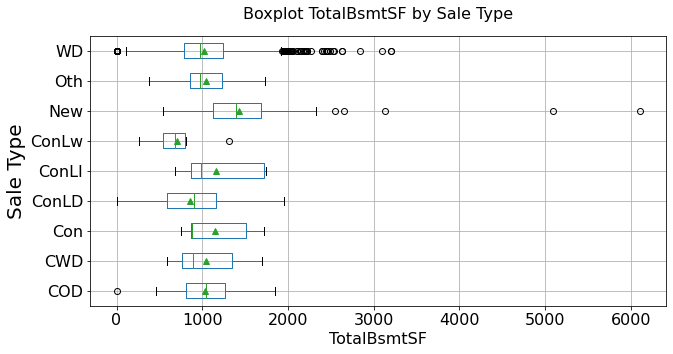

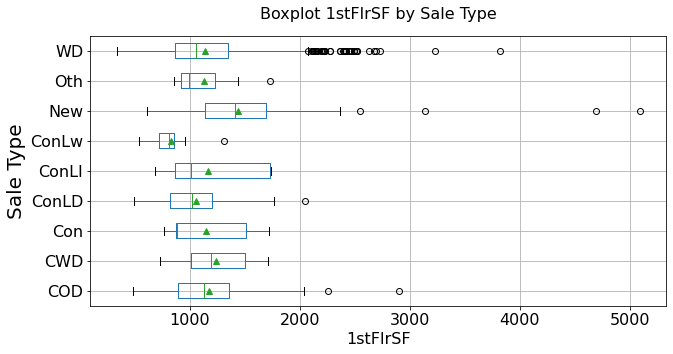

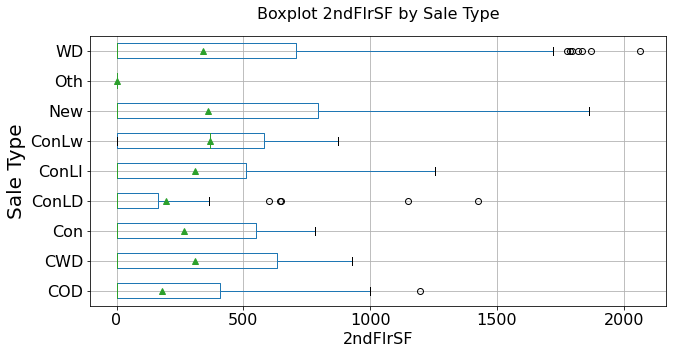

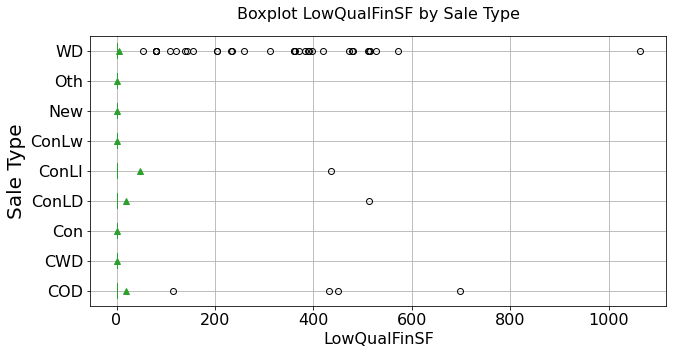

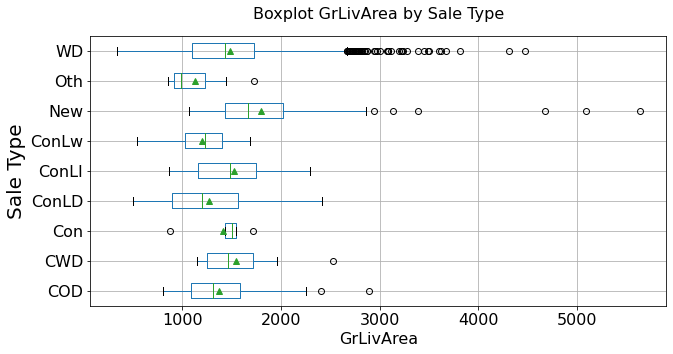

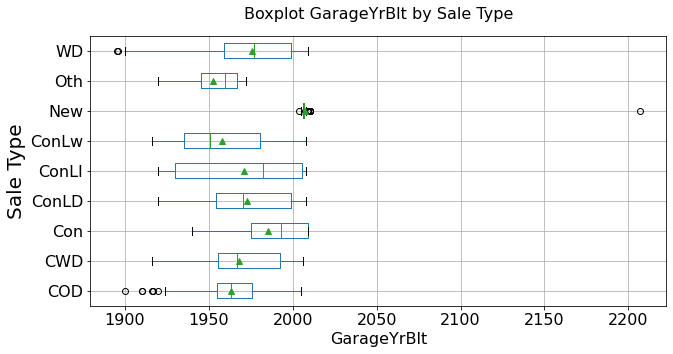

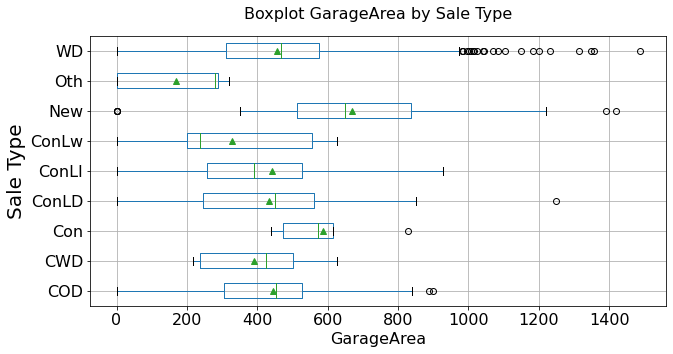

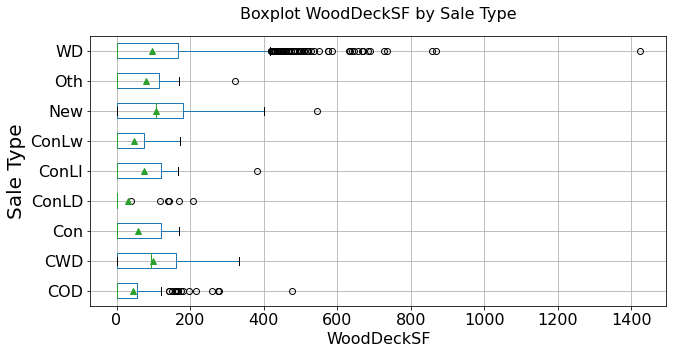

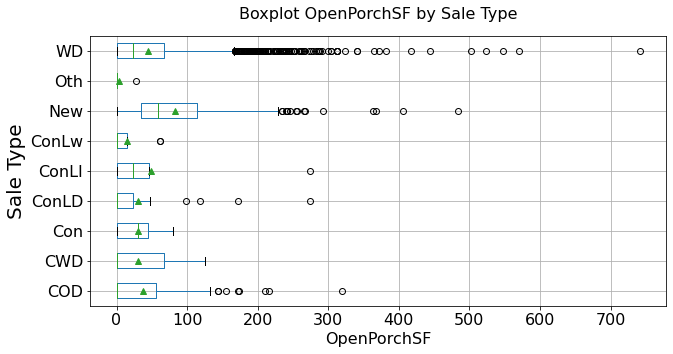

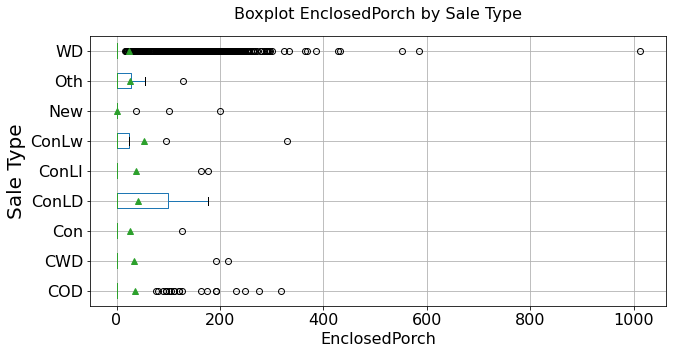

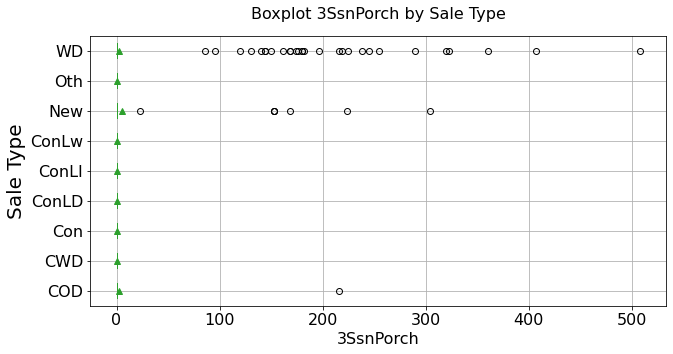

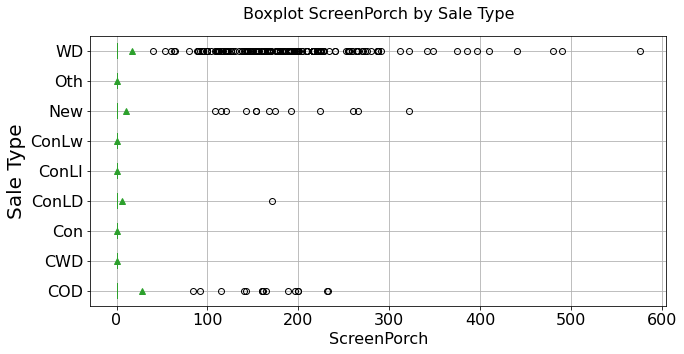

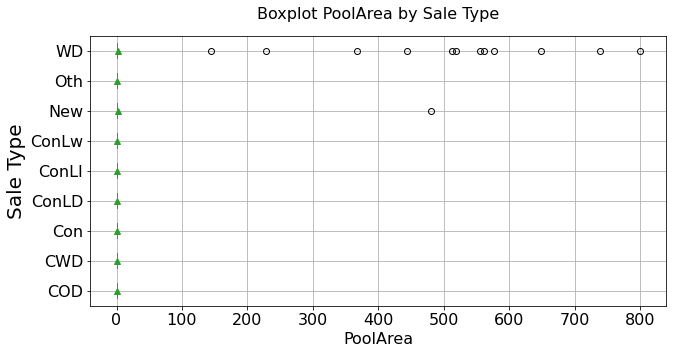

In [ ]:
# Boxplot de características numéricas según clases de columna objetivo
# Crear lista con los índices de una lista
# Columnas de interés

list_column = ['LotArea','YearBuilt','YearRemodAdd',
              'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
              'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
              'GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF',
              'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
              'PoolArea']
# Bucle para graficar boxplot
for index,col in enumerate(list_column):
  Title=('Boxplot ' + col +' by Sale Type\n ')
  df.boxplot(column=[col],
                    by='SaleType',
                    vert=False,
                    #notch=True,
                    showmeans=True,
                    figsize=(10,5))
  plt.suptitle(Title,fontsize=16);
  plt.title('');
  plt.xlabel(col, fontsize = 16);
  plt.ylabel('Sale Type', fontsize = 20);
  plt.xticks(fontsize = 16);
  plt.yticks(fontsize = 16);
  plt.show

## 2.2. Correlaciones

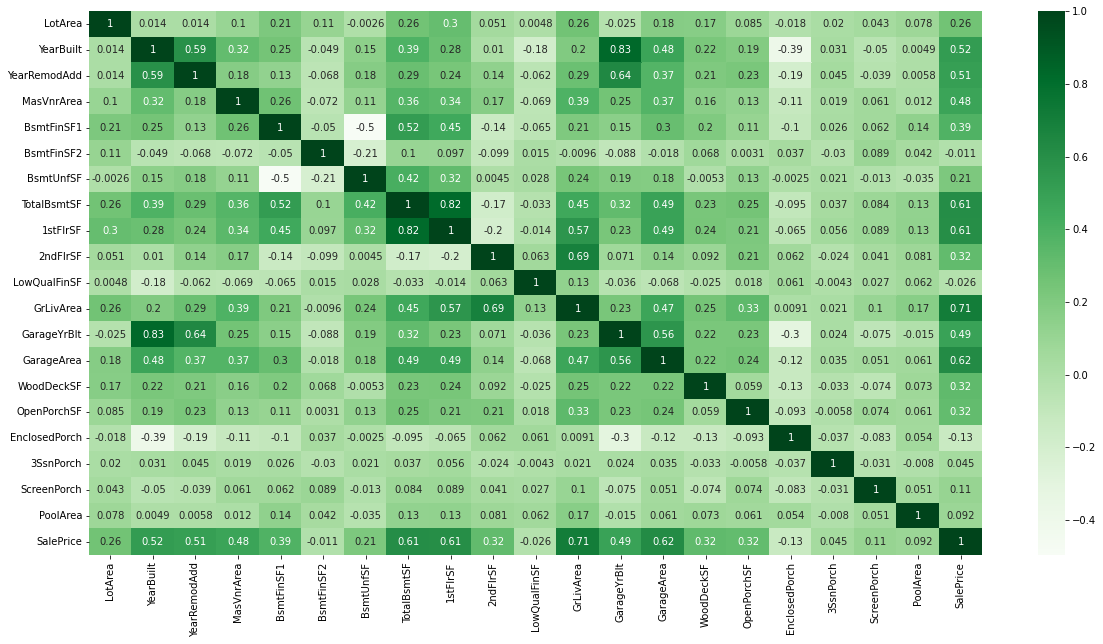

In [ ]:
# La correlación más mayor fuerza en el conjunto de datos son:
corr = df[df['SalePrice']>0].corr()
# Crear mapa de calor de correlaciones
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, cmap = 'Greens', annot = True)

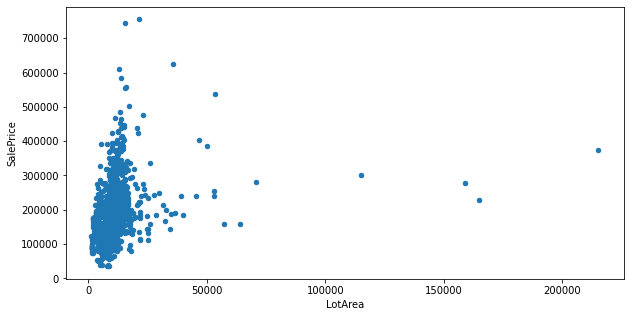

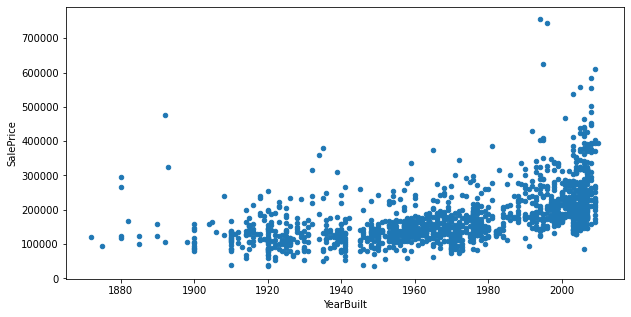

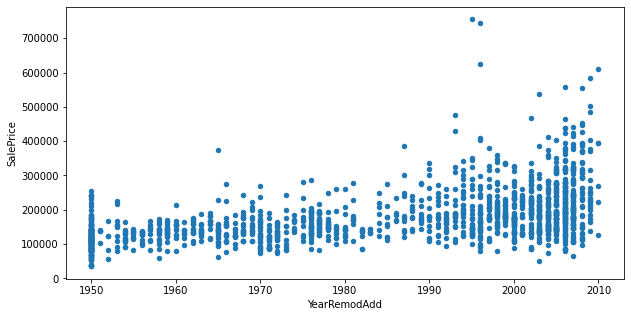

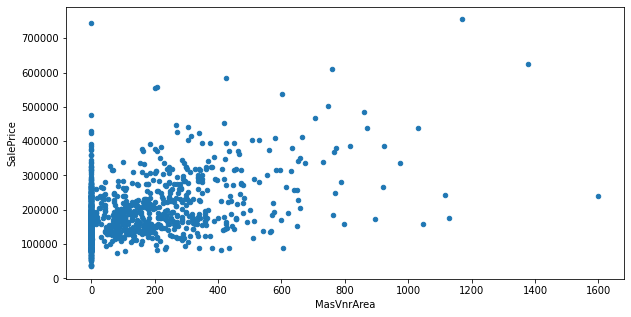

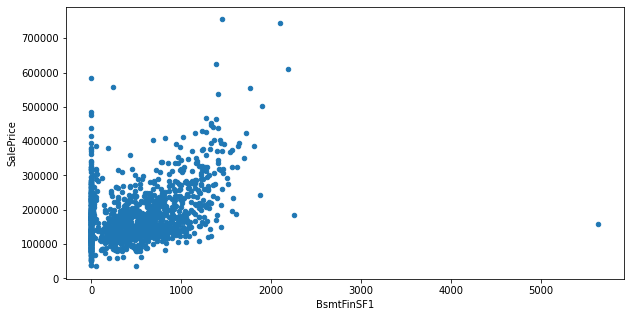

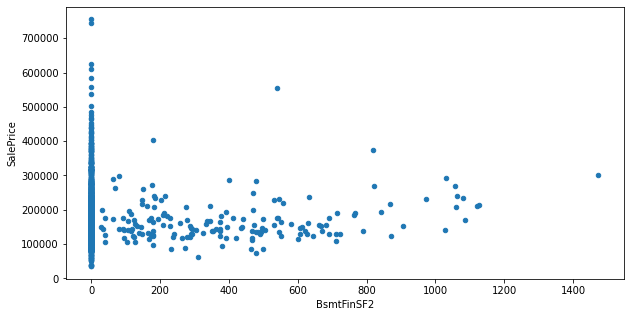

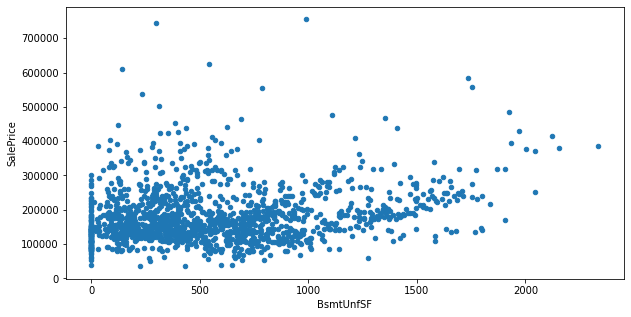

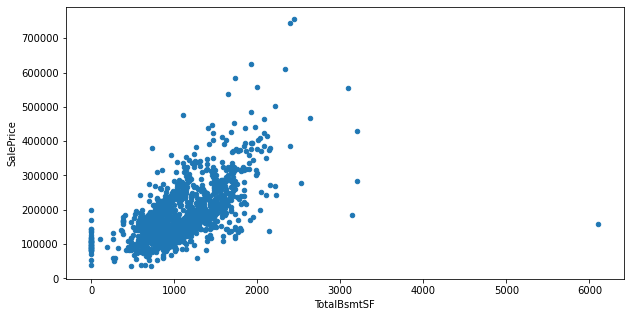

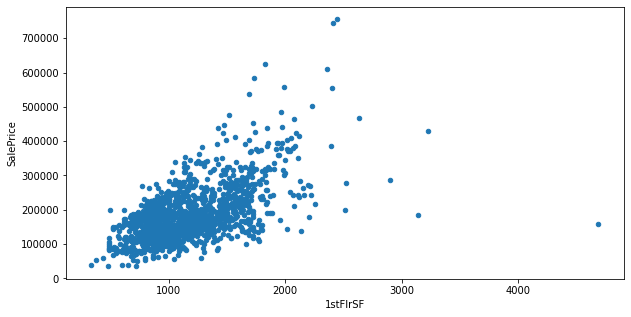

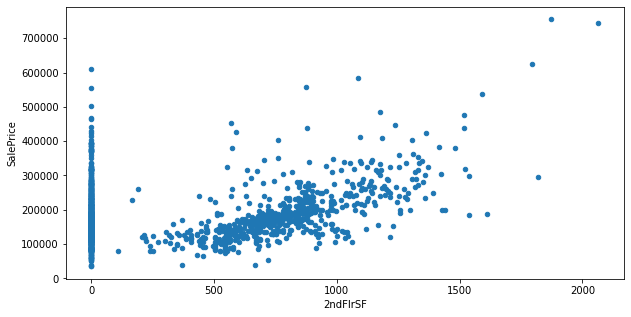

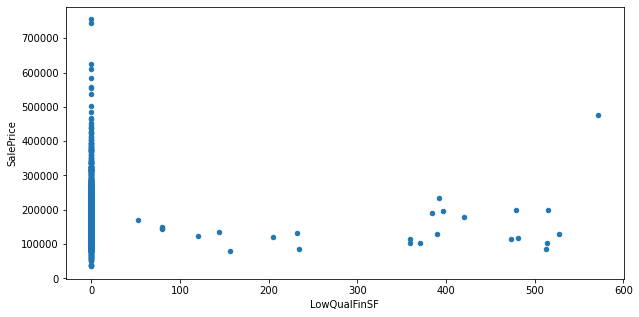

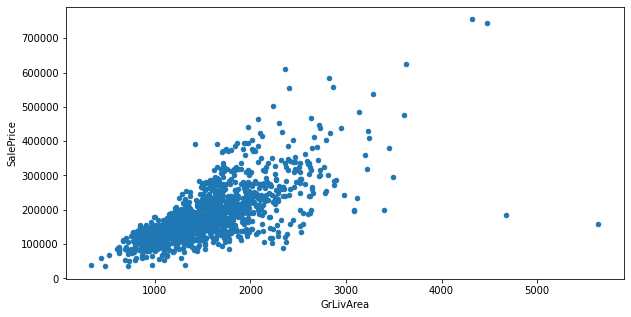

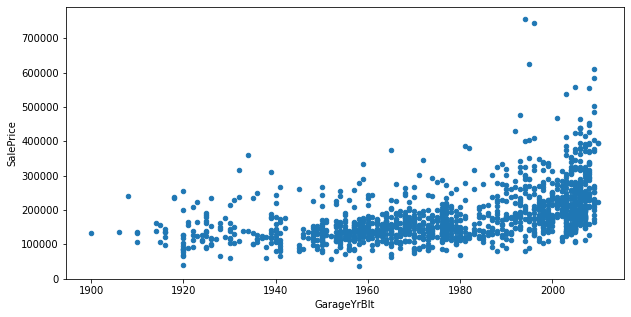

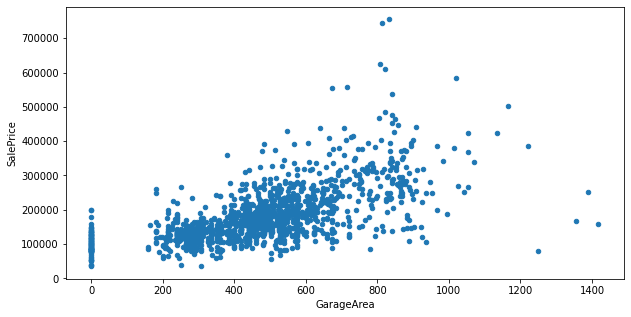

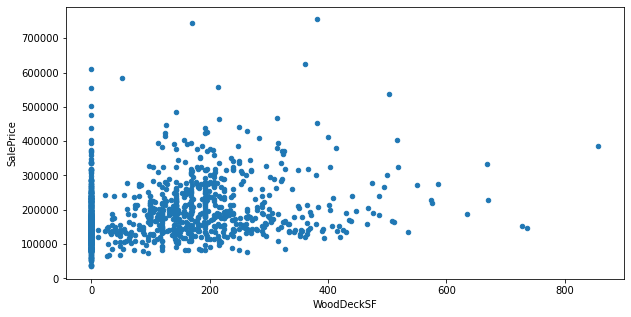

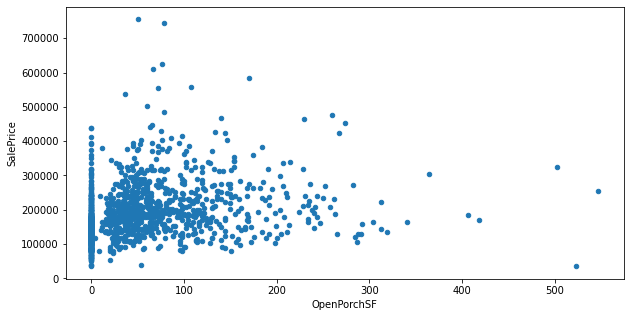

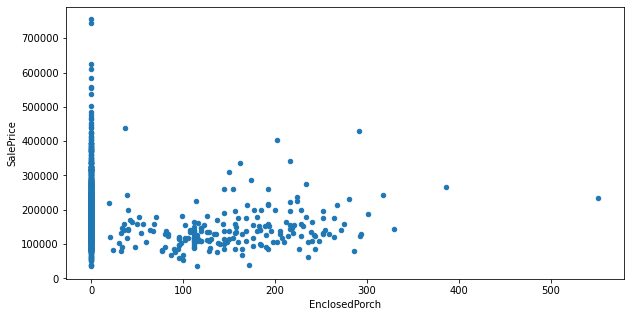

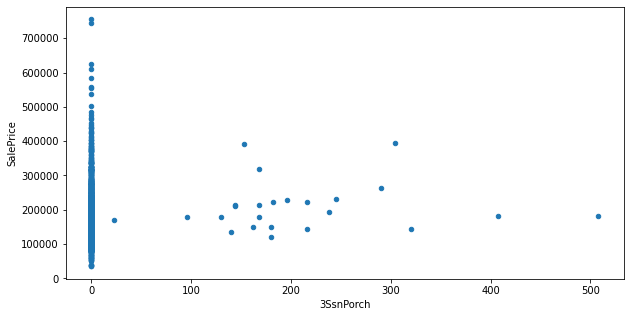

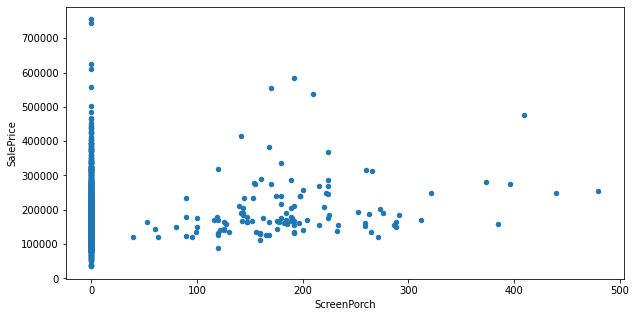

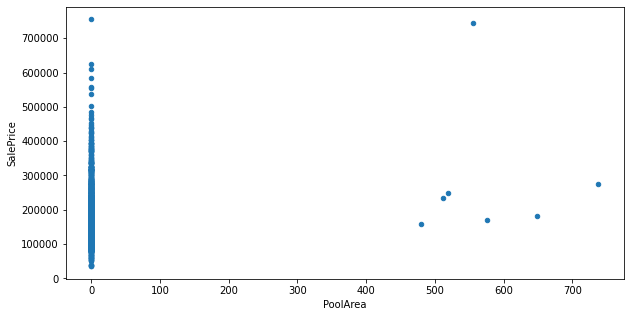

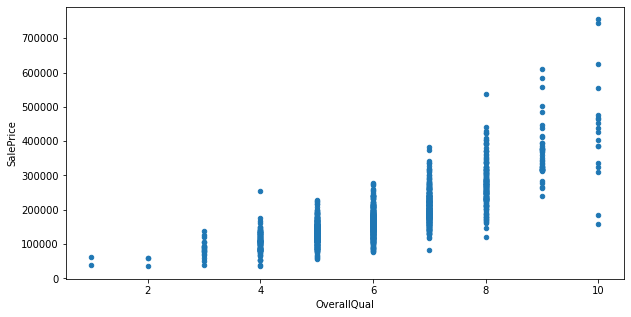

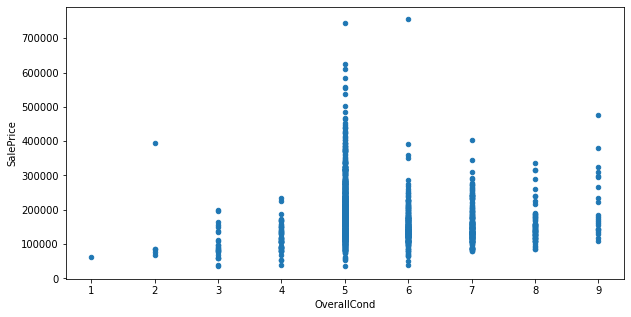

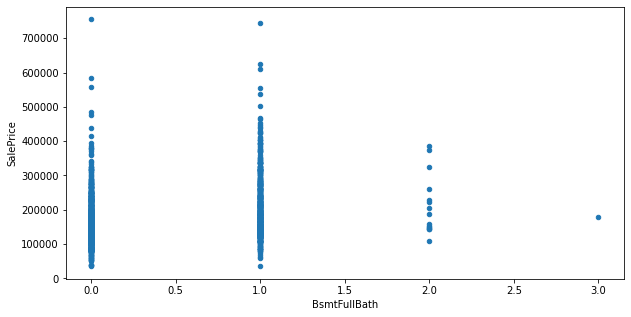

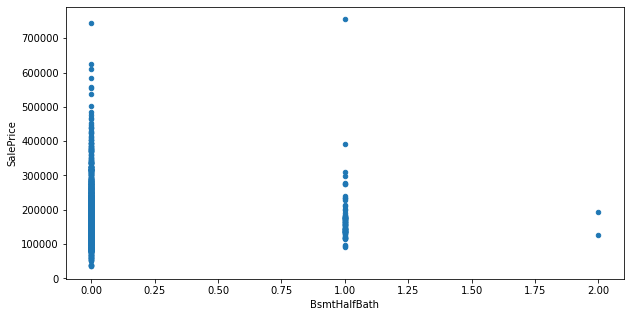

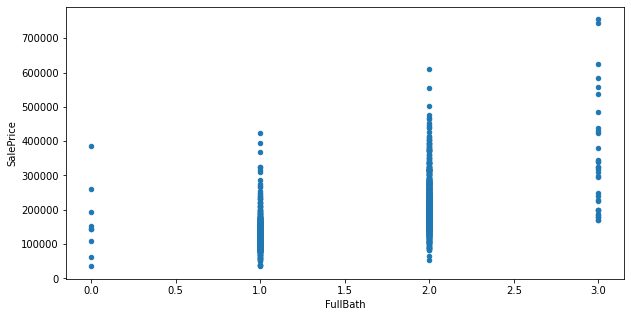

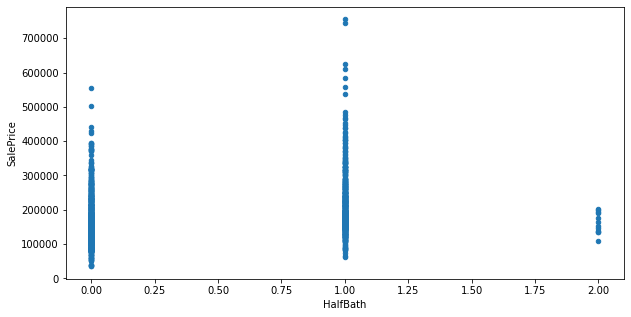

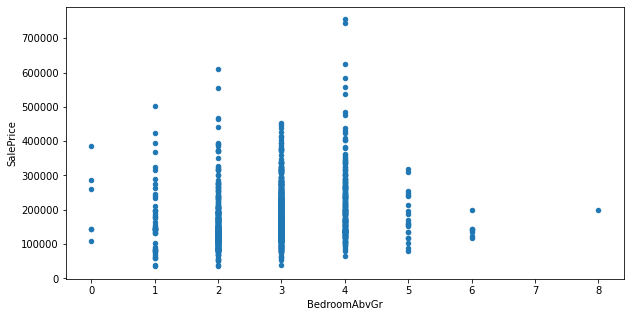

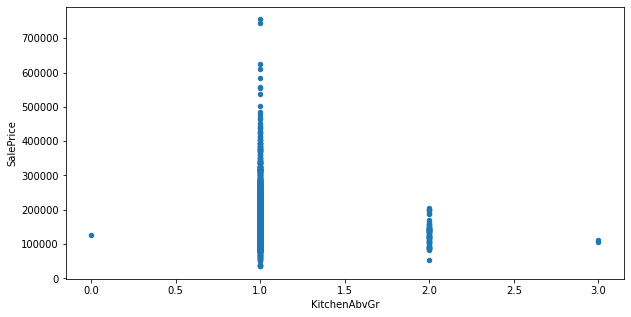

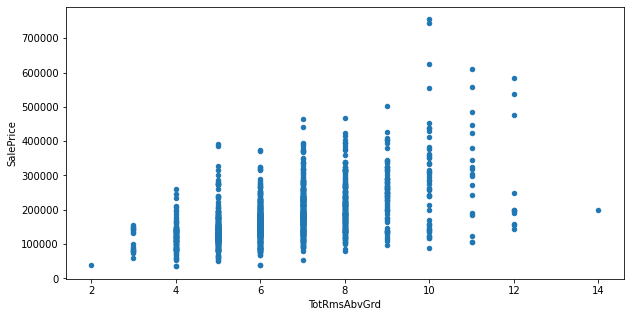

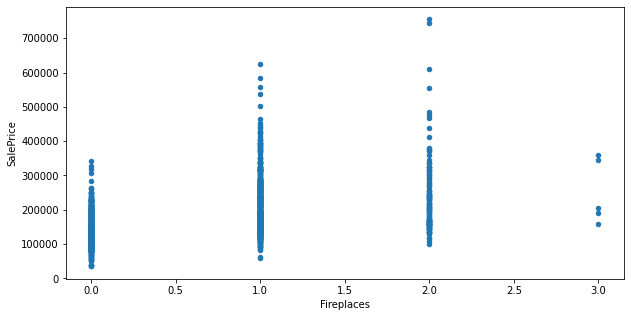

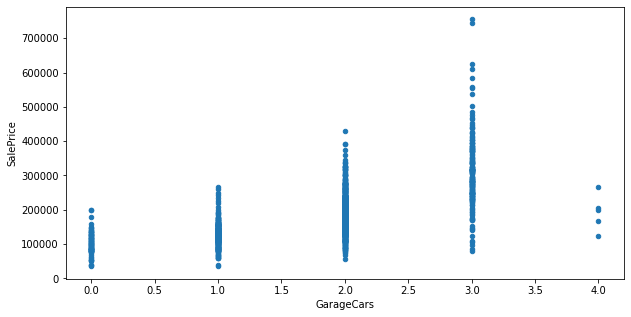

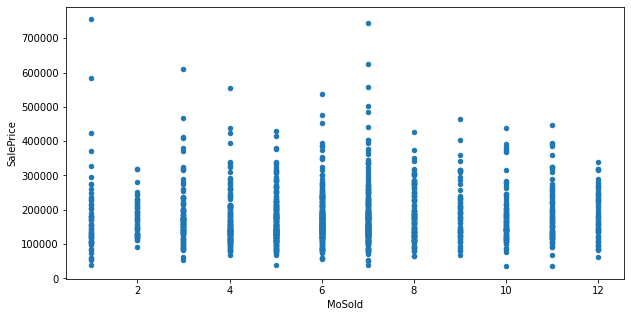

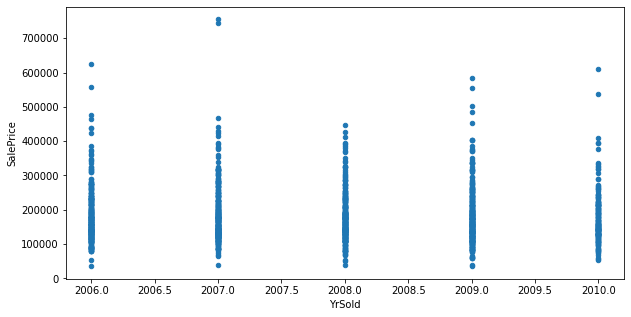

In [ ]:
# Grafico de dispersión de carcaterísticas numéricas y ordinales versus vector objetivo
col_type= ['LotArea','YearBuilt','YearRemodAdd',
              'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
              'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
              'GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF',
              'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
              'PoolArea','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath',
              'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
              'TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']


# Bucle para graficar
for index,col in enumerate(col_type):
  df[df['SalePrice']>0].plot(col,'SalePrice',kind='scatter',figsize=(10,5))
  #save_fig("attribute_histogram_plots")
  plt.show()


# **3. Preprocesamiento de datos para ML**

## 3.1. Identificar matriz de características (X) y vector objetivo (y).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     2919 non-null   object  
 1   MSZoning       2915 non-null   object  
 2   LotArea        2919 non-null   float64 
 3   Street         2919 non-null   object  
 4   LotShape       2919 non-null   object  
 5   LandContour    2919 non-null   object  
 6   LotConfig      2919 non-null   object  
 7   LandSlope      2919 non-null   object  
 8   Neighborhood   2919 non-null   object  
 9   Condition1     2919 non-null   object  
 10  Condition2     2919 non-null   object  
 11  BldgType       2919 non-null   object  
 12  HouseStyle     2919 non-null   object  
 13  OverallQual    2919 non-null   category
 14  OverallCond    2919 non-null   category
 15  YearBuilt      2919 non-null   float64 
 16  YearRemodAdd   2919 non-null   float64 
 17  RoofStyle      2919 non-null   ob

## 3.2. Codificar características ordinales

In [ ]:
# Realizado en 1.4.

## 3.3. Separar los datos en un matriz de características (X) y un vector objetivo (y).

In [ ]:
# Separar conjunto de datos train/test Kaggle
# Crear filtro para valores NaN en columna 'SalePrice'
missing_SalePrice=df['SalePrice'].isna()
# Revisar filas que contienen NaN para y
df_test_original=df.loc[missing_SalePrice,:]
#df_test_original=df.iloc[1460:]
df=df.loc[~missing_SalePrice,:]
#df=df.iloc[:1460]


## 3.3. Separar los datos en un matriz de características (X) y un vector objetivo (y).

In [ ]:
y=df['SalePrice']
X=df.drop(columns=['SalePrice'])
X_test_original=df_test_original.drop(columns=['SalePrice'])

## 3.4. Crear un train test split en los datos. Utilicen un número aleatorio 42 por coherencia.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.4)


#y_train=df_train['SalePrice']
#y_test=df_test['SalePrice']
#X_train = df_train.drop(columns=['SalePrice'])
#X_test = df_test.drop(columns=['SalePrice'])

## 3.5. Crear instancia de selectores de columnas

In [ ]:
# Crear instancia de selectores de columnas
cat_selector_nom = make_column_selector(dtype_include='object')
cat_selector_ord = make_column_selector(dtype_include='category')
num_selector = make_column_selector(dtype_include='float64')

## 3.6. Crear instancia de transformadores

In [ ]:
# Crear instancia de transformadores
freq_imputer= SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
scaler=StandardScaler()
ohe=OneHotEncoder(handle_unknown='ignore',sparse=False)
#ore=OrdinalEncoder(handle_unknown='ignore')
ore=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

## 3.7. Crear instancia de pipeline

In [ ]:
# Pipeline numérico
numeric_pipe = make_pipeline(mean_imputer,scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
# Pipeline categórico - nominal
categorical_nom_pipe = make_pipeline(freq_imputer,ohe)
categorical_nom_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
# Pipeline categórico - ordinal
categorical_ord_pipe = make_pipeline(freq_imputer,ore)
categorical_ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1))])

## 3.8. Crear instancia de ColumnTransformer

In [ ]:
# Tuplas para Column_Tranformer
number_tuple=(numeric_pipe,num_selector)
category_nom_tuple=(categorical_nom_pipe,cat_selector_nom)
category_ord_tuple=(categorical_ord_pipe,cat_selector_ord)

# Crear instancia ColumnTransformer
preprocessor = make_column_transformer(number_tuple,category_nom_tuple,category_ord_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f79972e0f90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown=...
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7997e078d0>),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7998417b50>)])

## 3.9. Aplicar transformador de datos

In [ ]:
# Ajustar pipeline en los datos de entrenamiento
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f79972e0f90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown=...
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7997e078d0>),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7998417b50>)])

In [ ]:
# Transformar conjunto de datos de entrenamiento y prueba
X_train_processed=preprocessor.transform(X_train)
X_test_processed=preprocessor.transform(X_test)
X_test_original_processed=preprocessor.transform(X_test_original)

3.10. Examinar resultado

In [ ]:
# Examinar resultado de la transformación
print('\n______________')
print("Valores faltantes en conjunto entrenamiento:",np.isnan(X_train_processed).sum().sum())
print("Valores faltantes en conjunto pruebas:",np.isnan(X_test_processed).sum().sum())
print('\n______________')
print('Todos los datos en X_train_processed son de tipo:',X_train_processed.dtype)
print('Todos los datos en X_test_processed son de tipo:',X_test_processed.dtype)
print('\n______________')
print('La forma de los datos train es:',X_train_processed.shape)
print('La forma de los datos test es:',X_test_processed.shape)
print('\n______________')
X_train_processed



______________
Valores faltantes en conjunto entrenamiento: 0
Valores faltantes en conjunto pruebas: 0

______________
Todos los datos en X_train_processed son de tipo: float64
Todos los datos en X_test_processed son de tipo: float64

______________
La forma de los datos train es: (876, 274)
La forma de los datos test es: (584, 274)

______________


array([[-0.09811229, -1.48463821,  0.25803038, ...,  2.        ,
         7.        ,  0.        ],
       [-0.37527456, -1.32231787,  0.35362548, ...,  2.        ,
         5.        ,  2.        ],
       [ 0.2743245 ,  0.30088559, -0.21994512, ...,  2.        ,
         5.        ,  3.        ],
       ...,
       [-0.21590625, -0.51071614,  0.25803038, ...,  2.        ,
         3.        ,  0.        ],
       [-0.2596253 , -1.71188669,  0.64041078, ...,  1.        ,
         5.        ,  1.        ],
       [-0.58611585,  1.17741546,  1.07058873, ...,  3.        ,
         5.        ,  3.        ]])

#4.Modelo clásicos ML

##4.1. Regresion Lineal

In [ ]:
# Crear instancia del modelo de regresión ML
reg=LinearRegression()

# Entrenar modelo con datos de entrenamiento
reg.fit(X_train_processed,y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=reg.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=reg.predict(X_test_processed)

# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=reg.score(X_train_processed,y_train)

# Coeficiente de determinación r^2 sobre datos de prueba
test_score=reg.score(X_test_processed,y_test)

# Error medio absoluto (MAE)
mae_train=mean_absolute_error(y_train,train_preds)
mae_test=mean_absolute_error(y_test,test_preds)

# Error cuadrático medio (MSE)
mse_train=mean_squared_error(y_train,train_preds)
mse_test=mean_squared_error(y_test,test_preds)

# Raíz del error cuadrático medio (RMSE)
rmse_train=np.sqrt(mean_squared_error(y_train,train_preds))
rmse_test=np.sqrt(mean_squared_error(y_test,test_preds))

# Guardar resultados del modelo ML
bench_model_df  = pd.DataFrame([['LinearRegression',train_score,mae_train,mse_train,rmse_train,
                                 test_score,mae_test,mse_test,rmse_test,train_score/test_score]],
                                index=[0],
                                columns=['Name_model', 'train_model_r2', 'train_model_MAE', 'train_model_MSE',
                                         'train_model_RMSE','test_model_r2', 'test_model_MAE', 'test_model_MSE',
                                         'test_model_RMSE','veces_r2_train_test'])

# Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo de regresión lineal')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][4],2))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][5],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][6],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][7],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][8],2))
print('-----------------------------------------------------')
print('veces r^2 train/test:',round(bench_model_df.loc[len(bench_model_df)-1][9],2))




Métricas de evaluación del modelo de regresión lineal
Nombre del modelo: LinearRegression
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Coeficiente de determinación r^2: 0.94
Error medio absoluto: 12323.09
Error medio cuadrático: 369006395.77
Raíz del error medio cuadrático: 19209.54
-----------------------------------------------------
Conjunto de datos de prueba:
Coeficiente de determinación r^2: -6.433061299140409e+18
Error medio absoluto: 19287008064765.35
Error medio cuadrático: 4.6624364037936595e+28
Raíz del error medio cuadrático: 215926756188149.6
-----------------------------------------------------
veces r^2 train/test: -0.0


##4.2. Árbol de regresión

###4.2.1. Modelo por defecto

In [ ]:
# Crear instancia de modelo de regresión ML
dec_tree=DecisionTreeRegressor(random_state=42)

#Entrenar modelo con datos de entrenamiento
dec_tree.fit(X_train_processed,y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=dec_tree.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=dec_tree.predict(X_test_processed)

# MÉTRICAS DE EVALUACIÓN
# Coeficiente de determinación r^2 sobre datos de entrenamiento y prueba
train_score=dec_tree.score(X_train_processed,y_train)
test_score=dec_tree.score(X_test_processed,y_test)

# Error medio absoluto (MAE)
mae_train=mean_absolute_error(y_train,train_preds)
mae_test=mean_absolute_error(y_test,test_preds)

# Error cuadrático medio (MSE)
mse_train=mean_squared_error(y_train,train_preds)
mse_test=mean_squared_error(y_test,test_preds)

# Raíz del error cuadrático medio (RMSE)
rmse_train=np.sqrt(mean_squared_error(y_train,train_preds))
rmse_test=np.sqrt(mean_squared_error(y_test,test_preds))

# Crear serie con valores a agregar a df
new_row = pd.Series(['DecisionTreeRegressor',train_score,mae_train,mse_train,rmse_train,test_score,mae_test,mse_test,rmse_test,round(train_score/test_score,2)],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

## Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo de regresión lineal')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][4],2))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][5],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][6],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][7],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][8],2))
print('-----------------------------------------------------')
print('veces r^2 train/test:',round(bench_model_df.loc[len(bench_model_df)-1][9],2))




Métricas de evaluación del modelo de regresión lineal
Nombre del modelo: DecisionTreeRegressor
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Coeficiente de determinación r^2: 1.0
Error medio absoluto: 0.0
Error medio cuadrático: 0.0
Raíz del error medio cuadrático: 0.0
-----------------------------------------------------
Conjunto de datos de prueba:
Coeficiente de determinación r^2: 0.71
Error medio absoluto: 28008.87
Error medio cuadrático: 2076633949.94
Raíz del error medio cuadrático: 45570.1
-----------------------------------------------------
veces r^2 train/test: 1.4


###4.2.2. Modelo con hiperparámetro(s) afinado(s)


In [ ]:
# Parámetros e hiperparámetros del modelo
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 36))# will try every value between 2 and 36
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

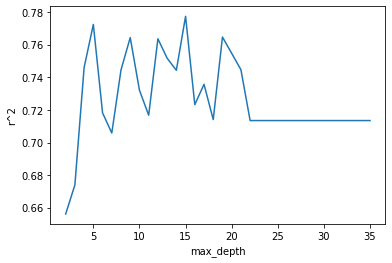

In [ ]:
# Visualicen qué max_depth lleva a una puntuación R2 más alta
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('r^2');

In [ ]:
# Crear instancia de modelo de regresión ML
dec_tree=DecisionTreeRegressor(max_depth=15,random_state=42)

#Entrenar modelo con datos de entrenamiento
dec_tree.fit(X_train_processed,y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=dec_tree.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=dec_tree.predict(X_test_processed)

# MÉTRICAS DE EVALUACIÓN
# Coeficiente de determinación r^2 sobre datos de entrenamiento y prueba
train_score=dec_tree.score(X_train_processed,y_train)
test_score=dec_tree.score(X_test_processed,y_test)

# Error medio absoluto (MAE)
mae_train=mean_absolute_error(y_train,train_preds)
mae_test=mean_absolute_error(y_test,test_preds)

# Error cuadrático medio (MSE)
mse_train=mean_squared_error(y_train,train_preds)
mse_test=mean_squared_error(y_test,test_preds)

# Raíz del error cuadrático medio (RMSE)
rmse_train=np.sqrt(mean_squared_error(y_train,train_preds))
rmse_test=np.sqrt(mean_squared_error(y_test,test_preds))

# Crear serie con valores a agregar a df
new_row = pd.Series(['DecisionTreeRegressor_tunning',train_score,mae_train,mse_train,rmse_train,test_score,mae_test,mse_test,rmse_test,round(train_score/test_score,2)],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

## Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo de regresión lineal')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][4],2))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][5],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][6],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][7],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][8],2))
print('-----------------------------------------------------')
print('veces r^2 train/test:',round(bench_model_df.loc[len(bench_model_df)-1][9],2))

Métricas de evaluación del modelo de regresión lineal
Nombre del modelo: DecisionTreeRegressor_tunning
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Coeficiente de determinación r^2: 1.0
Error medio absoluto: 352.54
Error medio cuadrático: 1712370.32
Raíz del error medio cuadrático: 1308.58
-----------------------------------------------------
Conjunto de datos de prueba:
Coeficiente de determinación r^2: 0.78
Error medio absoluto: 26314.33
Error medio cuadrático: 1613318319.61
Raíz del error medio cuadrático: 40166.13
-----------------------------------------------------
veces r^2 train/test: 1.29


##4.4. Bagging

###4.4.1. Modelo por defecto

In [ ]:
# Crear instancia del modelo de regresión ML
bagreg = BaggingRegressor(random_state=42)

# Entrenar modelo con datos de entrenamiento
bagreg.fit(X_train_processed,y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=bagreg.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=bagreg.predict(X_test_processed)

# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=bagreg.score(X_train_processed,y_train)
test_score=bagreg.score(X_test_processed,y_test)

# Error medio absoluto (MAE)
mae_train=mean_absolute_error(y_train,train_preds)
mae_test=mean_absolute_error(y_test,test_preds)

# Error cuadrático medio (MSE)
mse_train=mean_squared_error(y_train,train_preds)
mse_test=mean_squared_error(y_test,test_preds)

# Raíz del error cuadrático medio (RMSE)
rmse_train=np.sqrt(mean_squared_error(y_train,train_preds))
rmse_test=np.sqrt(mean_squared_error(y_test,test_preds))

# Crear serie con valores a agregar a df
new_row = pd.Series(['Bagging',train_score,mae_train,mse_train,rmse_train,test_score,mae_test,mse_test,rmse_test,round(train_score/test_score,2)],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

# Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo de regresión lineal')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][4],2))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][5],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][6],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][7],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][8],2))
print('-----------------------------------------------------')
print('veces r^2 train/test:',round(bench_model_df.loc[len(bench_model_df)-1][9],2))


Métricas de evaluación del modelo de regresión lineal
Nombre del modelo: Bagging
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Coeficiente de determinación r^2: 0.96
Error medio absoluto: 8260.68
Error medio cuadrático: 226954124.18
Raíz del error medio cuadrático: 15065.0
-----------------------------------------------------
Conjunto de datos de prueba:
Coeficiente de determinación r^2: 0.84
Error medio absoluto: 19082.53
Error medio cuadrático: 1149462042.86
Raíz del error medio cuadrático: 33903.72
-----------------------------------------------------
veces r^2 train/test: 1.14


###4.3.2. Modelo con hiperparámetro(s) afinado(s)

In [ ]:
# Parámetros e hiperparámetros del modelo
bagreg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Grilla de parámetros
# Agregar experimentos independientes como diccionarios
# <https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html?highlight=bagging#sklearn.ensemble.BaggingRegressor>
param_grid = [{
    #'base_estimator': (None),
    #'bootstrap': [True,False],
    #'bootstrap_features': [True,False],
    #'max_features': (1.0),
    #'max_samples': (1.0),
    'n_estimators': [int(x) for x in np.linspace(start = 5, stop = 25, num = 20)],
    #'n_jobs': (None),
    #'oob_score': (False),
    'random_state': [42],
    #'verbose': (0),
    #'warm_start': (False)
    }
]

# Crear instancia del modelo de regresión ML
bag_reg = BaggingRegressor(random_state=42)

# Crear instancia de grilla de búsqueda de hiperparámetros
grid_search = GridSearchCV(bag_reg, param_grid, cv=5,        # cd=5 iteraciones para cada prueba
                           return_train_score=True)

# Ajustar la grilla al conjunto de datos de entrenamiento
grid_search.fit(X_train_processed, y_train)

# Notas: desventajas del método con modelos con muchos hiperparámetros, que lo convierte en un ejercicio complejo

GridSearchCV(cv=5, estimator=BaggingRegressor(random_state=42),
             param_grid=[{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                           15, 16, 17, 18, 19, 20, 21, 22, 23,
                                           25],
                          'random_state': [42]}],
             return_train_score=True)

In [ ]:
# Inicializar instancia de validación cruzada en la regreseión
cvres = grid_search.cv_results_
# zip junta parámetros en dos listas como uno a uno
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values) # Mostramos el accuracy y el n_estimator en cada prueba de validación


(0.8012707750765173, {'n_estimators': 5, 'random_state': 42})
(0.8009520261973039, {'n_estimators': 6, 'random_state': 42})
(0.8041479028027766, {'n_estimators': 7, 'random_state': 42})
(0.8100914158663317, {'n_estimators': 8, 'random_state': 42})
(0.813948912794366, {'n_estimators': 9, 'random_state': 42})
(0.8137711873299022, {'n_estimators': 10, 'random_state': 42})
(0.8179495511423316, {'n_estimators': 11, 'random_state': 42})
(0.815654904786188, {'n_estimators': 12, 'random_state': 42})
(0.8170991194382221, {'n_estimators': 13, 'random_state': 42})
(0.816362649241673, {'n_estimators': 14, 'random_state': 42})
(0.8196668303921257, {'n_estimators': 15, 'random_state': 42})
(0.8214992178665905, {'n_estimators': 16, 'random_state': 42})
(0.8219985089996197, {'n_estimators': 17, 'random_state': 42})
(0.8231753888548671, {'n_estimators': 18, 'random_state': 42})
(0.8225075645307681, {'n_estimators': 19, 'random_state': 42})
(0.8226961975212245, {'n_estimators': 20, 'random_state': 42})


In [ ]:
# Crear instancia del modelo de regresión ML
bagreg_tunn = BaggingRegressor(n_estimators=11,random_state=42)

# Entrenar modelo con datos de entrenamiento
bagreg_tunn.fit(X_train_processed,y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=bagreg_tunn.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=bagreg_tunn.predict(X_test_processed)

# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=bagreg_tunn.score(X_train_processed,y_train)
test_score=bagreg_tunn.score(X_test_processed,y_test)

# Error medio absoluto (MAE)
mae_train=mean_absolute_error(y_train,train_preds)
mae_test=mean_absolute_error(y_test,test_preds)

# Error cuadrático medio (MSE)
mse_train=mean_squared_error(y_train,train_preds)
mse_test=mean_squared_error(y_test,test_preds)

# Raíz del error cuadrático medio (RMSE)
rmse_train=np.sqrt(mean_squared_error(y_train,train_preds))
rmse_test=np.sqrt(mean_squared_error(y_test,test_preds))

# Crear serie con valores a agregar a df
new_row = pd.Series(['Bagging tunning',train_score,mae_train,mse_train,rmse_train,test_score,mae_test,mse_test,rmse_test,round(train_score/test_score,2)],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

# Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo de regresión lineal')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][4],2))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][5],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][6],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][7],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][8],2))
print('-----------------------------------------------------')
print('veces r^2 train/test:',round(bench_model_df.loc[len(bench_model_df)-1][9],2))

Métricas de evaluación del modelo de regresión lineal
Nombre del modelo: Bagging tunning
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Coeficiente de determinación r^2: 0.96
Error medio absoluto: 8170.24
Error medio cuadrático: 222629096.55
Raíz del error medio cuadrático: 14920.76
-----------------------------------------------------
Conjunto de datos de prueba:
Coeficiente de determinación r^2: 0.84
Error medio absoluto: 19042.74
Error medio cuadrático: 1160953161.64
Raíz del error medio cuadrático: 34072.76
-----------------------------------------------------
veces r^2 train/test: 1.14


##4.4. Random Forest

###4.4.1. Modelo por defecto

In [ ]:
# Crear instancia del modelo de regresión ML
rf = RandomForestRegressor(random_state = 42)

# Entrenar modelo con datos de entrenamiento
rf.fit(X_train_processed,y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=rf.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=rf.predict(X_test_processed)

# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=rf.score(X_train_processed,y_train)
test_score=rf.score(X_test_processed,y_test)

# Error medio absoluto (MAE)
mae_train=mean_absolute_error(y_train,train_preds)
mae_test=mean_absolute_error(y_test,test_preds)

# Error cuadrático medio (MSE)
mse_train=mean_squared_error(y_train,train_preds)
mse_test=mean_squared_error(y_test,test_preds)

# Raíz del error cuadrático medio (RMSE)
rmse_train=np.sqrt(mean_squared_error(y_train,train_preds))
rmse_test=np.sqrt(mean_squared_error(y_test,test_preds))

# Crear serie con valores a agregar a df
new_row = pd.Series(['RandomForest',train_score,mae_train,mse_train,rmse_train,test_score,mae_test,mse_test,rmse_test,round(train_score/test_score,2)],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

# Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo de regresión lineal')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][4],2))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][5],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][6],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][7],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][8],2))
print('-----------------------------------------------------')
print('veces r^2 train/test:',round(bench_model_df.loc[len(bench_model_df)-1][9],2))


Métricas de evaluación del modelo de regresión lineal
Nombre del modelo: RandomForest
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Coeficiente de determinación r^2: 0.97
Error medio absoluto: 6810.4
Error medio cuadrático: 142582934.78
Raíz del error medio cuadrático: 11940.81
-----------------------------------------------------
Conjunto de datos de prueba:
Coeficiente de determinación r^2: 0.87
Error medio absoluto: 17532.32
Error medio cuadrático: 910865980.88
Raíz del error medio cuadrático: 30180.56
-----------------------------------------------------
veces r^2 train/test: 1.12


###4.4.2. Modelo con hiperparámetro(s) afinado(s)

In [ ]:
# Revisar hiperparámetros del modelo
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Grilla de parámetros
# Agregar experimentos independientes como diccionarios
# <https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=randomforest#sklearn.ensemble.RandomForestRegressor>
param_grid = [{
    #'bootstrap' : [True,False],
    ##'ccp_alpha' : [0.0],
    ##'criterion' : ('squared_error'),
    #'max_depth'   : [1,2,3] ,
    #'max_features' : ['auto','sqrt'],
    ##'max_leaf_nodes' : (None),
    ##'max_samples' : (None),
    #'min_impurity_decrease' : [0.0],
    #'min_samples_leaf' : [1],     #[1-10% train sample]
    #'min_samples_split' : [2],
    #'min_weight_fraction_leaf' : [0.0],
    'n_estimators' : [int(x) for x in np.linspace(start = 95, stop = 205, num = 10)],
    ##'n_jobs' : (None),
    ##'oob_score' : (False),
    'random_state' : [42],
    ##'verbose' : (0),
    ##'warm_start' : (False)
    }
]
# Crear instancia del modelo de regresión ML
rndf_reg = RandomForestRegressor()

# Crear instancia de grilla de búsqueda de hiperparámetros
grid_search = GridSearchCV(rndf_reg, param_grid, cv=5,        # cd=5 iteraciones para cada prueba
                           return_train_score=True)

# Ajustar la grilla al conjunto de datos de entrenamiento
grid_search.fit(X_train_processed, y_train)


# Notas: desventajas del método con modelos con muchos hiperparámetros, que lo convierte en un ejercicio complejo

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'n_estimators': [95, 107, 119, 131, 143, 156, 168,
                                           180, 192, 205],
                          'random_state': [42]}],
             return_train_score=True)

In [ ]:
# Inicializar instancia de validación cruzada en la regreseión
cvres = grid_search.cv_results_
# zip junta parámetros en dos listas como uno a uno
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values) # Mostramos el accuracy y el n_estimator en cada prueba de validación

(0.8257395498242509, {'n_estimators': 95, 'random_state': 42})
(0.8250083239134565, {'n_estimators': 107, 'random_state': 42})
(0.8234595406609433, {'n_estimators': 119, 'random_state': 42})
(0.8238018652022451, {'n_estimators': 131, 'random_state': 42})
(0.8236655678653806, {'n_estimators': 143, 'random_state': 42})
(0.824285119958622, {'n_estimators': 156, 'random_state': 42})
(0.8250125220220117, {'n_estimators': 168, 'random_state': 42})
(0.8256416199072693, {'n_estimators': 180, 'random_state': 42})
(0.8249695470457736, {'n_estimators': 192, 'random_state': 42})
(0.8257261901481954, {'n_estimators': 205, 'random_state': 42})


In [ ]:
# Crear instancia del modelo de regresión ML
rf_tunn = RandomForestRegressor(n_estimators=180,random_state = 42)

# Entrenar modelo con datos de entrenamiento
rf_tunn.fit(X_train_processed,y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=rf_tunn.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=rf_tunn.predict(X_test_processed)

# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=rf_tunn.score(X_train_processed,y_train)
test_score=rf_tunn.score(X_test_processed,y_test)

# Error medio absoluto (MAE)
mae_train=mean_absolute_error(y_train,train_preds)
mae_test=mean_absolute_error(y_test,test_preds)

# Error cuadrático medio (MSE)
mse_train=mean_squared_error(y_train,train_preds)
mse_test=mean_squared_error(y_test,test_preds)

# Raíz del error cuadrático medio (RMSE)
rmse_train=np.sqrt(mean_squared_error(y_train,train_preds))
rmse_test=np.sqrt(mean_squared_error(y_test,test_preds))

# Crear serie con valores a agregar a df
new_row = pd.Series(['RandomForest tunning',train_score,mae_train,mse_train,rmse_train,test_score,mae_test,mse_test,rmse_test,round(train_score/test_score,2)],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

# Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo de regresión lineal')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][4],2))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][5],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][6],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][7],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][8],2))
print('-----------------------------------------------------')
print('veces r^2 train/test:',round(bench_model_df.loc[len(bench_model_df)-1][9],2))


Métricas de evaluación del modelo de regresión lineal
Nombre del modelo: RandomForest tunning
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Coeficiente de determinación r^2: 0.97
Error medio absoluto: 6764.58
Error medio cuadrático: 142903017.87
Raíz del error medio cuadrático: 11954.21
-----------------------------------------------------
Conjunto de datos de prueba:
Coeficiente de determinación r^2: 0.88
Error medio absoluto: 17475.58
Error medio cuadrático: 901963732.26
Raíz del error medio cuadrático: 30032.71
-----------------------------------------------------
veces r^2 train/test: 1.11


#5.Modelos Boosting

##5.1. Gradient Boosting

In [ ]:
# Crear instancia del modelo de regresión ML
gbc = GradientBoostingRegressor(random_state = 42)

# Entrenar modelo con datos de entrenamiento
gbc.fit(X_train_processed, y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=gbc.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=gbc.predict(X_test_processed)

# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=gbc.score(X_train_processed,y_train)
test_score=gbc.score(X_test_processed,y_test)

# Error medio absoluto (MAE)
mae_train=mean_absolute_error(y_train,train_preds)
mae_test=mean_absolute_error(y_test,test_preds)

# Error cuadrático medio (MSE)
mse_train=mean_squared_error(y_train,train_preds)
mse_test=mean_squared_error(y_test,test_preds)

# Raíz del error cuadrático medio (RMSE)
rmse_train=np.sqrt(mean_squared_error(y_train,train_preds))
rmse_test=np.sqrt(mean_squared_error(y_test,test_preds))

# Crear serie con valores a agregar a df
new_row = pd.Series(['GBC',train_score,mae_train,mse_train,rmse_train,test_score,mae_test,mse_test,rmse_test,round(train_score/test_score,2)],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

# Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo de regresión lineal')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][4],2))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][5],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][6],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][7],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][8],2))
print('-----------------------------------------------------')
print('veces r^2 train/test:',round(bench_model_df.loc[len(bench_model_df)-1][9],2))


Métricas de evaluación del modelo de regresión lineal
Nombre del modelo: GBC
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Coeficiente de determinación r^2: 0.97
Error medio absoluto: 9383.33
Error medio cuadrático: 165053362.23
Raíz del error medio cuadrático: 12847.31
-----------------------------------------------------
Conjunto de datos de prueba:
Coeficiente de determinación r^2: 0.88
Error medio absoluto: 16568.98
Error medio cuadrático: 835018012.42
Raíz del error medio cuadrático: 28896.68
-----------------------------------------------------
veces r^2 train/test: 1.1


##5.2. LightGBM

In [ ]:
# Crear instancia del modelo de regresión ML
lgbm = LGBMRegressor(random_state = 42)

# Entrenar modelo con datos de entrenamiento
lgbm.fit(X_train_processed, y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=lgbm.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=lgbm.predict(X_test_processed)

# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=lgbm.score(X_train_processed,y_train)
test_score=lgbm.score(X_test_processed,y_test)

# Error medio absoluto (MAE)
mae_train=mean_absolute_error(y_train,train_preds)
mae_test=mean_absolute_error(y_test,test_preds)

# Error cuadrático medio (MSE)
mse_train=mean_squared_error(y_train,train_preds)
mse_test=mean_squared_error(y_test,test_preds)

# Raíz del error cuadrático medio (RMSE)
rmse_train=np.sqrt(mean_squared_error(y_train,train_preds))
rmse_test=np.sqrt(mean_squared_error(y_test,test_preds))

# Crear serie con valores a agregar a df
new_row = pd.Series(['LGBM',train_score,mae_train,mse_train,rmse_train,test_score,mae_test,mse_test,rmse_test,round(train_score/test_score,2)],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

# Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo de regresión lineal')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][4],2))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][5],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][6],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][7],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][8],2))
print('-----------------------------------------------------')
print('veces r^2 train/test:',round(bench_model_df.loc[len(bench_model_df)-1][9],2))


Métricas de evaluación del modelo de regresión lineal
Nombre del modelo: LGBM
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Coeficiente de determinación r^2: 0.98
Error medio absoluto: 4789.47
Error medio cuadrático: 125905391.7
Raíz del error medio cuadrático: 11220.76
-----------------------------------------------------
Conjunto de datos de prueba:
Coeficiente de determinación r^2: 0.88
Error medio absoluto: 16609.05
Error medio cuadrático: 894132858.89
Raíz del error medio cuadrático: 29902.05
-----------------------------------------------------
veces r^2 train/test: 1.12


##5.3. XGBoost

In [ ]:
# Crear instancia del modelo de regresión ML
xgbr = XGBRegressor(random_state = 42)

# Entrenar modelo con datos de entrenamiento
xgbr.fit(X_train_processed, y_train)

# Obtener predicciones del conjunto de entrenamiento
train_preds=xgbr.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=xgbr.predict(X_test_processed)

# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=xgbr.score(X_train_processed,y_train)
test_score=xgbr.score(X_test_processed,y_test)

# Error medio absoluto (MAE)
mae_train=mean_absolute_error(y_train,train_preds)
mae_test=mean_absolute_error(y_test,test_preds)

# Error cuadrático medio (MSE)
mse_train=mean_squared_error(y_train,train_preds)
mse_test=mean_squared_error(y_test,test_preds)

# Raíz del error cuadrático medio (RMSE)
rmse_train=np.sqrt(mean_squared_error(y_train,train_preds))
rmse_test=np.sqrt(mean_squared_error(y_test,test_preds))

# Crear serie con valores a agregar a df
new_row = pd.Series(['XGboost',train_score,mae_train,mse_train,rmse_train,test_score,mae_test,mse_test,rmse_test,round(train_score/test_score,2)],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

# Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo de regresión lineal')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][4],2))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][5],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][6],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][7],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][8],2))
print('-----------------------------------------------------')
print('veces r^2 train/test:',round(bench_model_df.loc[len(bench_model_df)-1][9],2))


[05:10:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Métricas de evaluación del modelo de regresión lineal
Nombre del modelo: XGboost
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Coeficiente de determinación r^2: 0.97
Error medio absoluto: 9646.82
Error medio cuadrático: 180721214.03
Raíz del error medio cuadrático: 13443.26
-----------------------------------------------------
Conjunto de datos de prueba:
Coeficiente de determinación r^2: 0.86
Error medio absoluto: 16884.84
Error medio cuadrático: 1012950906.7
Raíz del error medio cuadrático: 31826.89
-----------------------------------------------------
veces r^2 train/test: 1.13


#6.Modelo de redes neuronales (NN)

In [ ]:
# Paso 1: Definir la arquitectura de la red
# Conocer el número de características en la forma de entrada
input_shape = X_train_processed.shape[1]
input_shape

274

##6.1. NN s/regularización

In [ ]:
%%time
# Definir modelo secuencial
model = Sequential()

model.add(Dense(265, input_dim = input_shape, activation = 'relu')) # Primera capa oculta o de entrada, columnas en X, Función de activación
model.add(Dense(30, activation = 'relu')) 
model.add(Dense(3, activation = 'relu')) 
model.add(Dense(1, activation = 'relu')) # Capa de salida

# Paso 2: Compilar modelo
model.compile(loss = 'mse', optimizer = 'adam',
              metrics=["RootMeanSquaredError"])  # Clasificación->loss='bce' / Regresión->loss='ECM'

# Paso 3: Ajustar modelo
history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test), 
                    epochs=55)


Epoch 1/55
28/28 [==============================] - 1s 9ms/step - loss: 38040170496.0000 - root_mean_squared_error: 195038.8906 - val_loss: 40496488448.0000 - val_root_mean_squared_error: 201237.3906
Epoch 2/55
28/28 [==============================] - 0s 3ms/step - loss: 37967773696.0000 - root_mean_squared_error: 194853.2031 - val_loss: 40342953984.0000 - val_root_mean_squared_error: 200855.5625
Epoch 3/55
28/28 [==============================] - 0s 3ms/step - loss: 37682835456.0000 - root_mean_squared_error: 194120.6719 - val_loss: 39842197504.0000 - val_root_mean_squared_error: 199605.1094
Epoch 4/55
28/28 [==============================] - 0s 3ms/step - loss: 36902375424.0000 - root_mean_squared_error: 192099.9062 - val_loss: 38626648064.0000 - val_root_mean_squared_error: 196536.6406
Epoch 5/55
28/28 [==============================] - 0s 3ms/step - loss: 35207626752.0000 - root_mean_squared_error: 187636.9531 - val_loss: 36244426752.0000 - val_root_mean_squared_error: 190379.6875


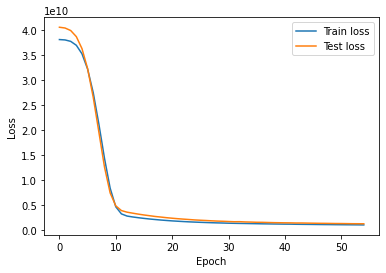

train: 0.8083871657533486
test: 0.8174302049272016


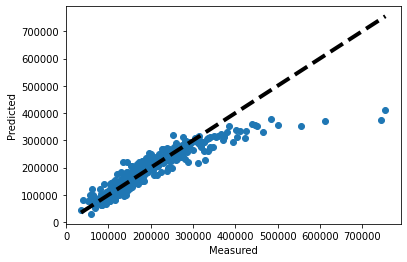

In [ ]:
# Visualizar las pérdidas
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.legend();
plt.show();

# Obtener predicciones del conjunto de train/test
train_preds=model.predict(X_train_processed)
test_preds=model.predict(X_test_processed)

# MÉTRICAS DE EVALUACIÓN
# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=r2_score(y_train,train_preds)
test_score=r2_score(y_test,test_preds)
print("train:",train_score)
print("test:",test_score)

# Graficar Observados versus Predichos
fig, ax = plt.subplots()
ax.scatter(y_test, test_preds)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# Obtener predicciones del conjunto de entrenamiento
train_preds=model.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=model.predict(X_test_processed)

# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=r2_score(y_train,train_preds)
test_score=r2_score(y_test,test_preds)

# Error medio absoluto (MAE)
mae_train=mean_absolute_error(y_train,train_preds)
mae_test=mean_absolute_error(y_test,test_preds)

# Error cuadrático medio (MSE)
mse_train=mean_squared_error(y_train,train_preds)
mse_test=mean_squared_error(y_test,test_preds)

# Raíz del error cuadrático medio (RMSE)
rmse_train=np.sqrt(mean_squared_error(y_train,train_preds))
rmse_test=np.sqrt(mean_squared_error(y_test,test_preds))

# Crear serie con valores a agregar a df
new_row = pd.Series(['NN 265/30/3/1 s/reg',train_score,mae_train,mse_train,rmse_train,test_score,mae_test,mse_test,rmse_test,round(train_score/test_score,2)],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

# Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo de regresión lineal')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][4],2))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][5],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][6],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][7],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][8],2))
print('-----------------------------------------------------')
print('veces r^2 train/test:',round(bench_model_df.loc[len(bench_model_df)-1][9],2))

Métricas de evaluación del modelo de regresión lineal
Nombre del modelo: NN 265/30/3/1 s/reg
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Coeficiente de determinación r^2: 0.81
Error medio absoluto: 19536.16
Error medio cuadrático: 1087799977.93
Raíz del error medio cuadrático: 32981.81
-----------------------------------------------------
Conjunto de datos de prueba:
Coeficiente de determinación r^2: 0.82
Error medio absoluto: 20274.89
Error medio cuadrático: 1323195939.22
Raíz del error medio cuadrático: 36375.76
-----------------------------------------------------
veces r^2 train/test: 0.99


##6.2. NN con regularización l1

In [ ]:
%%time
# Definir modelo secuencial
model = Sequential()

# Crear arquitectura de la red
model.add(Dense(200, input_dim = input_shape, activation = 'relu',
                kernel_regularizer=l1(0.01))) # Primera capa oculta o de entrada, columnas en X, Función de activación
model.add(Dense(70, activation = 'relu',
                kernel_regularizer=l1(0.01))) # Segunda capa oculta, salida 10
model.add(Dense(25, activation = 'relu',
                kernel_regularizer=l1(0.01))) # Segunda capa oculta, salida 10
model.add(Dense(1, activation = 'relu')) # Capa de salida

# Paso 2: Compilar modelo
model.compile(loss = 'mse', optimizer = 'adam',
              metrics=["RootMeanSquaredError"])  # Clasificación->loss='bce' / Regresión->loss='ECM'

# Paso 3: Ajustar modelo
history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test), 
                    epochs=40)


Epoch 1/40
28/28 [==============================] - 1s 17ms/step - loss: 38048919552.0000 - root_mean_squared_error: 195061.3281 - val_loss: 40524787712.0000 - val_root_mean_squared_error: 201307.6875
Epoch 2/40
28/28 [==============================] - 0s 7ms/step - loss: 38048919552.0000 - root_mean_squared_error: 195061.3281 - val_loss: 40524787712.0000 - val_root_mean_squared_error: 201307.6875
Epoch 3/40
28/28 [==============================] - 0s 5ms/step - loss: 38048923648.0000 - root_mean_squared_error: 195061.3281 - val_loss: 40524787712.0000 - val_root_mean_squared_error: 201307.6875
Epoch 4/40
28/28 [==============================] - 0s 7ms/step - loss: 38048866304.0000 - root_mean_squared_error: 195061.1875 - val_loss: 40523808768.0000 - val_root_mean_squared_error: 201305.2656
Epoch 5/40
28/28 [==============================] - 0s 6ms/step - loss: 38024581120.0000 - root_mean_squared_error: 194998.9219 - val_loss: 40432656384.0000 - val_root_mean_squared_error: 201078.7344

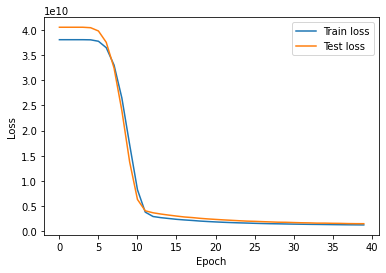

train: 0.78336206231625
test: 0.7945961759131804


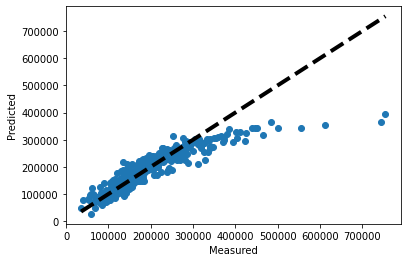

In [ ]:
# Visualizar las pérdidas
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.legend();
plt.show();

# Obtener predicciones del conjunto de train/test
train_preds=model.predict(X_train_processed)
test_preds=model.predict(X_test_processed)

# MÉTRICAS DE EVALUACIÓN
# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=r2_score(y_train,train_preds)
test_score=r2_score(y_test,test_preds)
print("train:",train_score)
print("test:",test_score)

# Graficar Observados versus Predichos
fig, ax = plt.subplots()
ax.scatter(y_test, test_preds)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# Obtener predicciones del conjunto de entrenamiento
train_preds=model.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=model.predict(X_test_processed)

# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=r2_score(y_train,train_preds)
test_score=r2_score(y_test,test_preds)

# Error medio absoluto (MAE)
mae_train=mean_absolute_error(y_train,train_preds)
mae_test=mean_absolute_error(y_test,test_preds)

# Error cuadrático medio (MSE)
mse_train=mean_squared_error(y_train,train_preds)
mse_test=mean_squared_error(y_test,test_preds)

# Raíz del error cuadrático medio (RMSE)
rmse_train=np.sqrt(mean_squared_error(y_train,train_preds))
rmse_test=np.sqrt(mean_squared_error(y_test,test_preds))

# Crear serie con valores a agregar a df
new_row = pd.Series(['NN 200/70/25/1 c/reg l1',train_score,mae_train,mse_train,rmse_train,test_score,mae_test,mse_test,rmse_test,round(train_score/test_score,2)],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

# Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo de regresión lineal')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][4],2))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][5],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][6],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][7],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][8],2))
print('-----------------------------------------------------')
print('veces r^2 train/test:',round(bench_model_df.loc[len(bench_model_df)-1][9],2))

Métricas de evaluación del modelo de regresión lineal
Nombre del modelo: NN 200/70/25/1 c/reg l1
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Coeficiente de determinación r^2: 0.78
Error medio absoluto: 21346.0
Error medio cuadrático: 1229869307.85
Raíz del error medio cuadrático: 35069.49
-----------------------------------------------------
Conjunto de datos de prueba:
Coeficiente de determinación r^2: 0.79
Error medio absoluto: 21573.82
Error medio cuadrático: 1488688234.68
Raíz del error medio cuadrático: 38583.52
-----------------------------------------------------
veces r^2 train/test: 0.99


##6.3. NN con regularización l2

In [ ]:
%%time
# Definir modelo secuencial
model = Sequential()

# Crear arquitectura de la red
model.add(Dense(200, input_dim = input_shape, activation = 'relu',
                kernel_regularizer=l2(0.01))) # Primera capa oculta o de entrada, columnas en X, Función de activación
model.add(Dense(70, activation = 'relu',
                kernel_regularizer=l2(0.01))) # Segunda capa oculta, salida 10
model.add(Dense(25, activation = 'relu',
                kernel_regularizer=l2(0.01))) # Segunda capa oculta, salida 10
model.add(Dense(1, activation = 'relu')) # Capa de salida

# Paso 2: Compilar modelo
model.compile(loss = 'mse', optimizer = 'adam',
              metrics=["RootMeanSquaredError"])  # Clasificación->loss='bce' / Regresión->loss='ECM'

# Paso 3: Ajustar modelo
history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test), 
                    epochs=40)

Epoch 1/40
28/28 [==============================] - 1s 7ms/step - loss: 38048919552.0000 - root_mean_squared_error: 195061.3281 - val_loss: 40524750848.0000 - val_root_mean_squared_error: 201307.6094
Epoch 2/40
28/28 [==============================] - 0s 3ms/step - loss: 38042640384.0000 - root_mean_squared_error: 195045.2188 - val_loss: 40495759360.0000 - val_root_mean_squared_error: 201235.5781
Epoch 3/40
28/28 [==============================] - 0s 3ms/step - loss: 37915066368.0000 - root_mean_squared_error: 194717.9219 - val_loss: 40149372928.0000 - val_root_mean_squared_error: 200373.0781
Epoch 4/40
28/28 [==============================] - 0s 3ms/step - loss: 37129445376.0000 - root_mean_squared_error: 192690.0312 - val_loss: 38623817728.0000 - val_root_mean_squared_error: 196529.4375
Epoch 5/40
28/28 [==============================] - 0s 3ms/step - loss: 34540150784.0000 - root_mean_squared_error: 185849.8125 - val_loss: 34493689856.0000 - val_root_mean_squared_error: 185724.7656


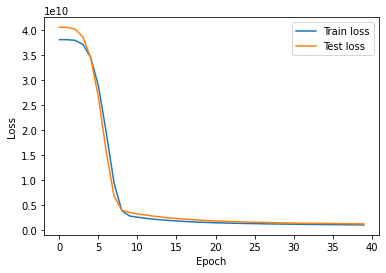

train: 0.8119062143461302
test: 0.8210760578649154


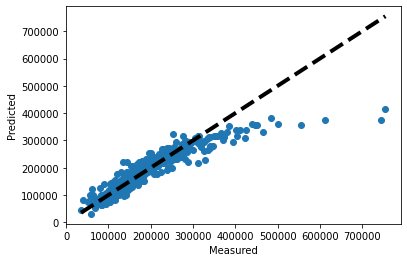

In [ ]:
# Visualizar las pérdidas
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.legend();
plt.show();

# Obtener predicciones del conjunto de train/test
train_preds=model.predict(X_train_processed)
test_preds=model.predict(X_test_processed)

# MÉTRICAS DE EVALUACIÓN
# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=r2_score(y_train,train_preds)
test_score=r2_score(y_test,test_preds)
print("train:",train_score)
print("test:",test_score)

# Graficar Observados versus Predichos
fig, ax = plt.subplots()
ax.scatter(y_test, test_preds)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# Obtener predicciones del conjunto de entrenamiento
train_preds=model.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=model.predict(X_test_processed)

# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=r2_score(y_train,train_preds)
test_score=r2_score(y_test,test_preds)

# Error medio absoluto (MAE)
mae_train=mean_absolute_error(y_train,train_preds)
mae_test=mean_absolute_error(y_test,test_preds)

# Error cuadrático medio (MSE)
mse_train=mean_squared_error(y_train,train_preds)
mse_test=mean_squared_error(y_test,test_preds)

# Raíz del error cuadrático medio (RMSE)
rmse_train=np.sqrt(mean_squared_error(y_train,train_preds))
rmse_test=np.sqrt(mean_squared_error(y_test,test_preds))

# Crear serie con valores a agregar a df
new_row = pd.Series(['NN 200/75/25/1 c/reg l2',train_score,mae_train,mse_train,rmse_train,test_score,mae_test,mse_test,rmse_test,round(train_score/test_score,2)],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

# Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo de regresión lineal')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][4],2))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][5],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][6],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][7],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][8],2))
print('-----------------------------------------------------')
print('veces r^2 train/test:',round(bench_model_df.loc[len(bench_model_df)-1][9],2))

Métricas de evaluación del modelo de regresión lineal
Nombre del modelo: NN 200/75/25/1 c/reg l2
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Coeficiente de determinación r^2: 0.81
Error medio absoluto: 19241.82
Error medio cuadrático: 1067822083.46
Raíz del error medio cuadrático: 32677.55
-----------------------------------------------------
Conjunto de datos de prueba:
Coeficiente de determinación r^2: 0.82
Error medio absoluto: 20078.28
Error medio cuadrático: 1296772193.72
Raíz del error medio cuadrático: 36010.72
-----------------------------------------------------
veces r^2 train/test: 0.99


##6.4. NN con regularización Dropout (exclusión)

In [ ]:
%%time
# Definir modelo secuencial
model = Sequential()

# Crear arquitectura de la red
model.add(Dense(265, input_dim = input_shape, activation = 'relu')) # Primera capa oculta o de entrada, columnas en X, Función de activación
model.add(Dropout(.3))
model.add(Dense(40, activation = 'relu')) # Segunda capa oculta, salida 10
model.add(Dropout(.3))
model.add(Dense(1, activation = 'relu')) # Capa de salida

# Paso 2: Compilar modelo
model.compile(loss = 'mse', optimizer = 'adam',
              metrics=["RootMeanSquaredError"])  # Clasificación->loss='bce' / Regresión->loss='ECM'

# Paso 3: Ajustar modelo
history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test), 
                    epochs=70)

Epoch 1/70
28/28 [==============================] - 1s 7ms/step - loss: 38044708864.0000 - root_mean_squared_error: 195050.5312 - val_loss: 40511893504.0000 - val_root_mean_squared_error: 201275.6719
Epoch 2/70
28/28 [==============================] - 0s 3ms/step - loss: 38013337600.0000 - root_mean_squared_error: 194970.0938 - val_loss: 40446664704.0000 - val_root_mean_squared_error: 201113.5625
Epoch 3/70
28/28 [==============================] - 0s 5ms/step - loss: 37896323072.0000 - root_mean_squared_error: 194669.7812 - val_loss: 40250040320.0000 - val_root_mean_squared_error: 200624.1250
Epoch 4/70
28/28 [==============================] - 0s 4ms/step - loss: 37600223232.0000 - root_mean_squared_error: 193907.7656 - val_loss: 39816921088.0000 - val_root_mean_squared_error: 199541.7812
Epoch 5/70
28/28 [==============================] - 0s 4ms/step - loss: 37038415872.0000 - root_mean_squared_error: 192453.6719 - val_loss: 39035498496.0000 - val_root_mean_squared_error: 197574.0312


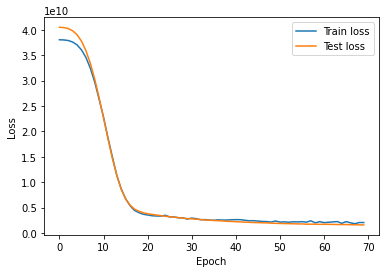

train: 0.7776740588604297
test: 0.7819308012982835


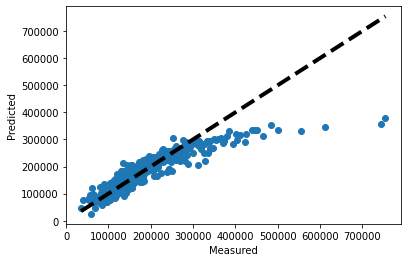

In [ ]:
# Visualizar las pérdidas
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.legend();
plt.show();

# Obtener predicciones del conjunto de train/test
train_preds=model.predict(X_train_processed)
test_preds=model.predict(X_test_processed)

# MÉTRICAS DE EVALUACIÓN
# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=r2_score(y_train,train_preds)
test_score=r2_score(y_test,test_preds)
print("train:",train_score)
print("test:",test_score)

# Graficar Observados versus Predichos
fig, ax = plt.subplots()
ax.scatter(y_test, test_preds)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# Obtener predicciones del conjunto de entrenamiento
train_preds=model.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=model.predict(X_test_processed)

# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=r2_score(y_train,train_preds)
test_score=r2_score(y_test,test_preds)

# Error medio absoluto (MAE)
mae_train=mean_absolute_error(y_train,train_preds)
mae_test=mean_absolute_error(y_test,test_preds)

# Error cuadrático medio (MSE)
mse_train=mean_squared_error(y_train,train_preds)
mse_test=mean_squared_error(y_test,test_preds)

# Raíz del error cuadrático medio (RMSE)
rmse_train=np.sqrt(mean_squared_error(y_train,train_preds))
rmse_test=np.sqrt(mean_squared_error(y_test,test_preds))

# Crear serie con valores a agregar a df
new_row = pd.Series(['NN 265/40/1 c/reg Dropout',train_score,mae_train,mse_train,rmse_train,test_score,mae_test,mse_test,rmse_test,round(train_score/test_score,2)],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

# Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo de regresión lineal')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][4],2))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][5],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][6],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][7],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][8],2))
print('-----------------------------------------------------')
print('veces r^2 train/test:',round(bench_model_df.loc[len(bench_model_df)-1][9],2))

Métricas de evaluación del modelo de regresión lineal
Nombre del modelo: NN 265/40/1 c/reg Dropout
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Coeficiente de determinación r^2: 0.78
Error medio absoluto: 21249.79
Error medio cuadrático: 1262160516.62
Raíz del error medio cuadrático: 35526.9
-----------------------------------------------------
Conjunto de datos de prueba:
Coeficiente de determinación r^2: 0.78
Error medio absoluto: 21607.23
Error medio cuadrático: 1580482018.27
Raíz del error medio cuadrático: 39755.28
-----------------------------------------------------
veces r^2 train/test: 0.99


##6.4. NN con regularización Early stop (detención temprana)

In [ ]:
%%time
# Definir modelo secuencial
model = Sequential()

model.add(Dense(265, input_dim = input_shape, activation = 'relu')) # Primera capa oculta o de entrada, columnas en X, Función de activación
model.add(Dense(40, activation = 'relu')) 
model.add(Dense(1, activation = 'relu')) # Capa de salida

# Paso 2: Compilar modelo
model.compile(loss = 'mse', optimizer = 'adam',
              metrics=["RootMeanSquaredError"])  # Clasificación->loss='bce' / Regresión->loss='ECM'

# Paso 3: Ajustar modelo
early_stopping = EarlyStopping(patience = 5) # Paciencia: Número de iteraciones sin mejora antes de parar el entrenamiento
history_earlystop = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test), 
                    epochs=1000,
                    callbacks=[early_stopping])

Epoch 1/1000
28/28 [==============================] - 1s 9ms/step - loss: 38042316800.0000 - root_mean_squared_error: 195044.3906 - val_loss: 40504209408.0000 - val_root_mean_squared_error: 201256.5781
Epoch 2/1000
28/28 [==============================] - 0s 3ms/step - loss: 37995864064.0000 - root_mean_squared_error: 194925.2812 - val_loss: 40412102656.0000 - val_root_mean_squared_error: 201027.6094
Epoch 3/1000
28/28 [==============================] - 0s 3ms/step - loss: 37840199680.0000 - root_mean_squared_error: 194525.5781 - val_loss: 40163184640.0000 - val_root_mean_squared_error: 200407.5469
Epoch 4/1000
28/28 [==============================] - 0s 3ms/step - loss: 37484281856.0000 - root_mean_squared_error: 193608.5781 - val_loss: 39654367232.0000 - val_root_mean_squared_error: 199134.0469
Epoch 5/1000
28/28 [==============================] - 0s 4ms/step - loss: 36827357184.0000 - root_mean_squared_error: 191904.5469 - val_loss: 38781509632.0000 - val_root_mean_squared_error: 19

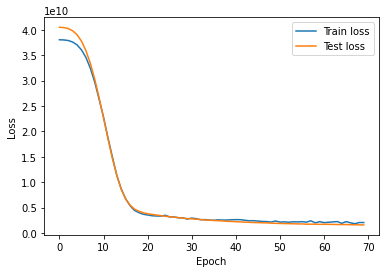

train: 0.8512106523480771
test: 0.8476816779626808


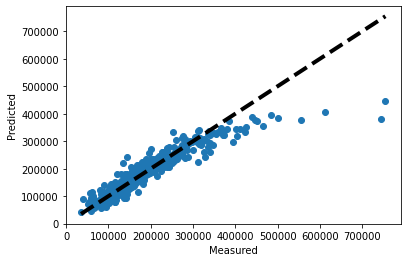

In [ ]:
# Visualizar las pérdidas
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.legend();
plt.show();

# Obtener predicciones del conjunto de train/test
train_preds=model.predict(X_train_processed)
test_preds=model.predict(X_test_processed)

# MÉTRICAS DE EVALUACIÓN
# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=r2_score(y_train,train_preds)
test_score=r2_score(y_test,test_preds)
print("train:",train_score)
print("test:",test_score)

# Graficar Observados versus Predichos
fig, ax = plt.subplots()
ax.scatter(y_test, test_preds)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# Obtener predicciones del conjunto de entrenamiento
train_preds=model.predict(X_train_processed)

# Obtener predicciones del conjunto de prueba
test_preds=model.predict(X_test_processed)

# Coeficiente de determinación r^2 sobre datos de entrenamiento
train_score=r2_score(y_train,train_preds)
test_score=r2_score(y_test,test_preds)

# Error medio absoluto (MAE)
mae_train=mean_absolute_error(y_train,train_preds)
mae_test=mean_absolute_error(y_test,test_preds)

# Error cuadrático medio (MSE)
mse_train=mean_squared_error(y_train,train_preds)
mse_test=mean_squared_error(y_test,test_preds)

# Raíz del error cuadrático medio (RMSE)
rmse_train=np.sqrt(mean_squared_error(y_train,train_preds))
rmse_test=np.sqrt(mean_squared_error(y_test,test_preds))

# Crear serie con valores a agregar a df
new_row = pd.Series(['NN 265/40/1 c/reg Early stop',train_score,mae_train,mse_train,rmse_train,test_score,mae_test,mse_test,rmse_test,round(train_score/test_score,2)],index=bench_model_df.columns)
# Cargar serie en df
bench_model_df = bench_model_df.append(new_row, ignore_index=True)

# Mostrar resultados del modelo ML
print('Métricas de evaluación del modelo de regresión lineal')
print('Nombre del modelo:',bench_model_df.loc[len(bench_model_df)-1][0])
print('-----------------------------------------------------')
print('Conjunto de datos de entrenamiento:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][1],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][2],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][3],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][4],2))
print('-----------------------------------------------------')
print('Conjunto de datos de prueba:')
print('Coeficiente de determinación r^2:',round(bench_model_df.loc[len(bench_model_df)-1][5],2))
print('Error medio absoluto:',round(bench_model_df.loc[len(bench_model_df)-1][6],2))
print('Error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][7],2))
print('Raíz del error medio cuadrático:',round(bench_model_df.loc[len(bench_model_df)-1][8],2))
print('-----------------------------------------------------')
print('veces r^2 train/test:',round(bench_model_df.loc[len(bench_model_df)-1][9],2))

Métricas de evaluación del modelo de regresión lineal
Nombre del modelo: NN 265/40/1 c/reg Early stop
-----------------------------------------------------
Conjunto de datos de entrenamiento:
Coeficiente de determinación r^2: 0.85
Error medio absoluto: 16407.57
Error medio cuadrático: 844687934.02
Raíz del error medio cuadrático: 29063.52
-----------------------------------------------------
Conjunto de datos de prueba:
Coeficiente de determinación r^2: 0.85
Error medio absoluto: 18526.58
Error medio cuadrático: 1103944850.84
Raíz del error medio cuadrático: 33225.67
-----------------------------------------------------
veces r^2 train/test: 1.0


#7.Comparación de modelos ML

In [ ]:
bench_model_df

,Name_model,train_model_r2,train_model_MAE,train_model_MSE,train_model_RMSE,test_model_r2,test_model_MAE,test_model_MSE,test_model_RMSE,veces_r2_train_test
0,LinearRegression,0.935001,12323.090183,3.690064e+08,19209.539187,-6.433061e+18,1.928701e+13,4.662436e+28,2.159268e+14,-1.453430e-19
1,DecisionTreeRegressor,1.000000,0.000000,0.000000e+00,0.000000,7.134736e-01,2.800887e+04,2.076634e+09,4.557010e+04,1.400000e+00
2,DecisionTreeRegressor_tunning,0.999698,352.539400,1.712370e+06,1308.575683,7.774002e-01,2.631433e+04,1.613318e+09,4.016613e+04,1.290000e+00
3,Bagging,0.960023,8260.684247,2.269541e+08,15064.996654,8.414014e-01,1.908253e+04,1.149462e+09,3.390372e+04,1.140000e+00
4,Bagging tunning,0.960785,8170.243254,2.226291e+08,14920.760589,8.398159e-01,1.904274e+04,1.160953e+09,3.407276e+04,1.140000e+00
5,RandomForest,0.974884,6810.398356,1.425829e+08,11940.809637,8.743220e-01,1.753232e+04,9.108660e+08,3.018056e+04,1.120000e+00
6,RandomForest tunning,0.974828,6764.580911,1.429030e+08,11954.205029,8.755503e-01,1.747558e+04,9.019637e+08,3.003271e+04,1.110000e+00
7,GBC,0.970926,9383.333675,1.650534e+08,12847.309533,8.847872e-01,1.656898e+04,8.350180e+08,2.889668e+04,1.100000e+00
8,LGBM,0.977822,4789.467523,1.259054e+08,11220.757180,8.766308e-01,1.660905e+04,8.941329e+08,2.990205e+04,1.120000e+00
9,XGboost,0.968166,9646.823233,1.807212e+08,13443.259055,8.602367e-01,1.688484e+04,1.012951e+09,3.182689e+04,1.130000e+00


In [ ]:
# Tabla de comparación ordenada por accuracy
round(bench_model_df.sort_values('test_model_r2',ascending=False),4)

,Name_model,train_model_r2,train_model_MAE,train_model_MSE,train_model_RMSE,test_model_r2,test_model_MAE,test_model_MSE,test_model_RMSE,veces_r2_train_test
7,GBC,0.9709,9383.3337,1.650534e+08,12847.3095,8.848000e-01,1.656898e+04,8.350180e+08,2.889668e+04,1.10
8,LGBM,0.9778,4789.4675,1.259054e+08,11220.7572,8.766000e-01,1.660905e+04,8.941329e+08,2.990205e+04,1.12
6,RandomForest tunning,0.9748,6764.5809,1.429030e+08,11954.2050,8.756000e-01,1.747558e+04,9.019637e+08,3.003271e+04,1.11
5,RandomForest,0.9749,6810.3984,1.425829e+08,11940.8096,8.743000e-01,1.753232e+04,9.108660e+08,3.018056e+04,1.12
9,XGboost,0.9682,9646.8232,1.807212e+08,13443.2591,8.602000e-01,1.688484e+04,1.012951e+09,3.182689e+04,1.13
14,NN 265/40/1 c/reg Early stop,0.8512,16407.5733,8.446879e+08,29063.5155,8.477000e-01,1.852658e+04,1.103945e+09,3.322567e+04,1.00
3,Bagging,0.9600,8260.6842,2.269541e+08,15064.9967,8.414000e-01,1.908253e+04,1.149462e+09,3.390372e+04,1.14
4,Bagging tunning,0.9608,8170.2433,2.226291e+08,14920.7606,8.398000e-01,1.904274e+04,1.160953e+09,3.407276e+04,1.14
12,NN 200/75/25/1 c/reg l2,0.8119,19241.8159,1.067822e+09,32677.5471,8.211000e-01,2.007828e+04,1.296772e+09,3.601072e+04,0.99
10,NN 265/30/3/1 s/reg,0.8084,19536.1562,1.087800e+09,32981.8128,8.174000e-01,2.027489e+04,1.323196e+09,3.637576e+04,0.99


#8.Predicción conjunto de datos test

In [ ]:
# Crear instancia del modelo de regresión ML
gbc = GradientBoostingRegressor(random_state = 42)

# Entrenar modelo con datos de entrenamiento
gbc.fit(X_train_processed, y_train)

# Obtener predicciones del conjunto de prueba
test_original_preds=gbc.predict(X_test_original_processed)

In [ ]:
to_submit=pd.DataFrame({'Id':X_test_original['Id'],'SalePrice':test_original_preds})

In [ ]:
to_submit.to_csv("/content/drive/MyDrive/Colab Notebooks/wk12_Kaggle/submission.csv",index=False)

In [ ]:
test_original_preds

array([123689.02567904, 157279.10281839, 181028.83700119, ...,
       166545.01194689, 124420.77212931, 237333.40296822])

In [ ]:
y_test_original = pd.DataFrame(test_original_preds, columns = ['SalePrice'])
y_test_original

,SalePrice
0,123689.025679
1,157279.102818
2,181028.837001
3,181830.896034
4,205375.370123
...,...
1454,83766.184552
1455,84904.275908
1456,166545.011947
1457,124420.772129


In [ ]:
X_test_original.reset_index(inplace=True)
X_test_original

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622.0,Pave,Reg,Lvl,Inside,Gtl,NAmes,...,140.0,0.0,0.0,0.0,120.0,0.0,6,2010,WD,Normal
1,1462,20,RL,14267.0,Pave,IR1,Lvl,Corner,Gtl,NAmes,...,393.0,36.0,0.0,0.0,0.0,0.0,6,2010,WD,Normal
2,1463,60,RL,13830.0,Pave,IR1,Lvl,Inside,Gtl,Gilbert,...,212.0,34.0,0.0,0.0,0.0,0.0,3,2010,WD,Normal
3,1464,60,RL,9978.0,Pave,IR1,Lvl,Inside,Gtl,Gilbert,...,360.0,36.0,0.0,0.0,0.0,0.0,6,2010,WD,Normal
4,1465,120,RL,5005.0,Pave,IR1,HLS,Inside,Gtl,StoneBr,...,0.0,82.0,0.0,0.0,144.0,0.0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936.0,Pave,Reg,Lvl,Inside,Gtl,MeadowV,...,0.0,0.0,0.0,0.0,0.0,0.0,6,2006,WD,Normal
1455,2916,160,RM,1894.0,Pave,Reg,Lvl,Inside,Gtl,MeadowV,...,0.0,24.0,0.0,0.0,0.0,0.0,4,2006,WD,Abnorml
1456,2917,20,RL,20000.0,Pave,Reg,Lvl,Inside,Gtl,Mitchel,...,474.0,0.0,0.0,0.0,0.0,0.0,9,2006,WD,Abnorml
1457,2918,85,RL,10441.0,Pave,Reg,Lvl,Inside,Gtl,Mitchel,...,80.0,32.0,0.0,0.0,0.0,0.0,7,2006,WD,Normal


In [ ]:
# Crear df con resultados de la predicción
train_df=pd.concat([X_test_original,y_test_original],axis=1,ignore_index=False)
train_df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,11622.0,Pave,Reg,Lvl,Inside,Gtl,NAmes,...,0.0,0.0,0.0,120.0,0.0,6,2010,WD,Normal,123689.025679
1,1462,20,RL,14267.0,Pave,IR1,Lvl,Corner,Gtl,NAmes,...,36.0,0.0,0.0,0.0,0.0,6,2010,WD,Normal,157279.102818
2,1463,60,RL,13830.0,Pave,IR1,Lvl,Inside,Gtl,Gilbert,...,34.0,0.0,0.0,0.0,0.0,3,2010,WD,Normal,181028.837001
3,1464,60,RL,9978.0,Pave,IR1,Lvl,Inside,Gtl,Gilbert,...,36.0,0.0,0.0,0.0,0.0,6,2010,WD,Normal,181830.896034
4,1465,120,RL,5005.0,Pave,IR1,HLS,Inside,Gtl,StoneBr,...,82.0,0.0,0.0,144.0,0.0,1,2010,WD,Normal,205375.370123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936.0,Pave,Reg,Lvl,Inside,Gtl,MeadowV,...,0.0,0.0,0.0,0.0,0.0,6,2006,WD,Normal,83766.184552
1455,2916,160,RM,1894.0,Pave,Reg,Lvl,Inside,Gtl,MeadowV,...,24.0,0.0,0.0,0.0,0.0,4,2006,WD,Abnorml,84904.275908
1456,2917,20,RL,20000.0,Pave,Reg,Lvl,Inside,Gtl,Mitchel,...,0.0,0.0,0.0,0.0,0.0,9,2006,WD,Abnorml,166545.011947
1457,2918,85,RL,10441.0,Pave,Reg,Lvl,Inside,Gtl,Mitchel,...,32.0,0.0,0.0,0.0,0.0,7,2006,WD,Normal,124420.772129


In [ ]:
train_df[['Id','SalePrice']].to_csv("/content/drive/MyDrive/Colab Notebooks/wk12_Kaggle/SalePrice_prediction.csv",index=False)

In [ ]:
to_submit=pd.DataFrame({'Id':X_test_original['Id'],'SalePrice':test_original_preds})

In [ ]:
to_submit

,Id,SalePrice
0,1461,123689.025679
1,1462,157279.102818
2,1463,181028.837001
3,1464,181830.896034
4,1465,205375.370123
...,...,...
1454,2915,83766.184552
1455,2916,84904.275908
1456,2917,166545.011947
1457,2918,124420.772129


#9.Ranking Kaggle

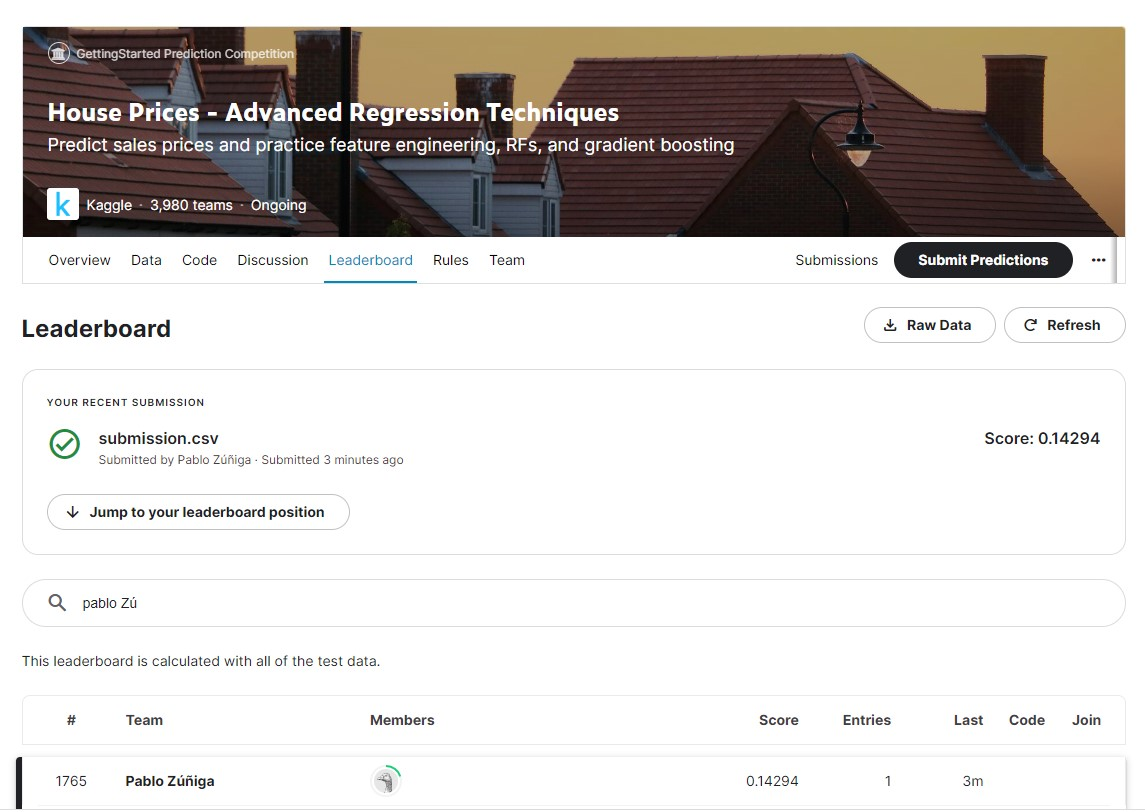